In [1]:
from limepy import limepy, sample
import numpy
from scipy.optimize import curve_fit

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
%config InlineBackend.figure_format = 'retina'
t_NGC6569_gaia = Table.read('D:/Astronomy/aaaaawork/gaia/globular_cluster/NGC6569/NGC6569_0.55degbox-result (1).fits',format='fits')

#t_NGC6569_gaia = pd.read_table('D:/Astronomy/aaaaawork/gaia/globular_cluster/NGC6569/NGC_6569.txt', delimiter='\t')
#ra_gaia = t_NGC6569_gaia['ra      ']
#dec_gaia = t_NGC6569_gaia['dec     ']    
ra_gaia = t_NGC6569_gaia['ra']
dec_gaia = t_NGC6569_gaia['dec']
pmra_gaia = t_NGC6569_gaia['pmra']
pmdec_gaia = t_NGC6569_gaia['pmdec']
bprp_gaia = t_NGC6569_gaia['bp_rp']
G_gaia = t_NGC6569_gaia['phot_g_mean_mag']
ra0=273.412
dec0=-31.826

In [3]:
np.max(dec_gaia)

-31.27600052132146

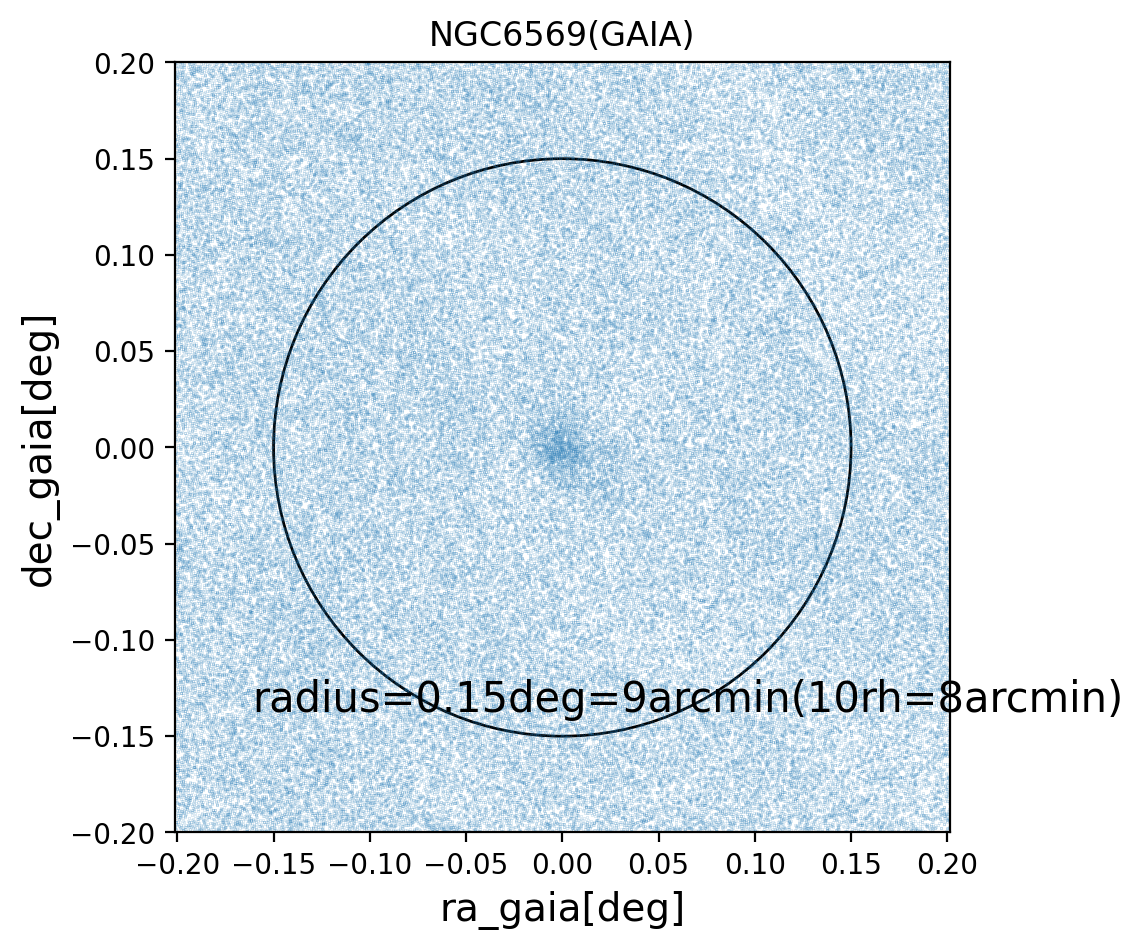

In [4]:
# Define the center and radius of the circle
plt.figure(figsize=(5,5))
ra0=273.412
dec0=-31.826

plt.plot(ra_gaia-ra0, dec_gaia-dec0, '.',ms=0.1, label='all points')

rad =  (ra_gaia-ra0)**2 + (dec_gaia-dec0)**2 
radec = (rad<0.15**2)&(rad>0.008**2)
ra_2 = ra_gaia[radec]
dec_2 = dec_gaia[radec]

circle = plt.Circle((0,0), 0.15, fill=False, color='black')
plt.gca().add_patch(circle)

plt.axis('equal')
#plt.plot(x,y,color='red')
#plt.xlim(8,12)
#plt.ylim(-8,-4)
plt.title("NGC6569(GAIA)")
plt.xlim(-0.2,0.2)
plt.ylim(-0.2,0.2)
plt.xlabel("ra_gaia[deg]",fontsize=14)
plt.ylabel("dec_gaia[deg]",fontsize=14)
plt.text(0.1,0.2, 'radius=0.15deg=9arcmin(10rh=8arcmin)',fontsize=15,verticalalignment='top' ,transform = plt.gca().transAxes)
plt.show() 

In [5]:
?limepy

Init signature: limepy(phi0, g, **kwargs)
Docstring:      <no docstring>
Init docstring:
(MM, A) LIMEPY

(Multi-Mass, Anisotropic) Lowered Isothermal Model Explorer in Python

This code solves the models presented in Gieles & Zocchi 2015 (GZ15),
and calculates radial profiles for some useful quantities. The models
are defined by the distribution function (DF) of equation (1) in GZ15.

Model parameters:

phi0 : scalar, required
     Central dimensionless potential
g : scalar, required
  Order of truncation (0<= g < 3.5; 0=Woolley, 1=King, 2=Wilson)

ra : scalar, required for anisotropic models
   Anisotropy radius; default=1e8
mj : list, required for multi-mass system
   Mean mass of each component; default=None
Mj : list, required for multi-mass system
   Total mass of each component; default=None
delta : scalar, optional
      Index in s_j = s x mu_j^-delta; default=0.5
      See equation (24) in GZ15
eta : scalar, optional
    Index in ra_j = ra x mu_j^eta; default=0
    See equation

In [5]:
ra_gaia_2 = ra_gaia[radec]
dec_gaia_2 = dec_gaia[radec]
pmra_gaia_2 = pmra_gaia[radec]
pmdec_gaia_2 = pmdec_gaia[radec]
bprp_gaia_2 = bprp_gaia[radec] 
G_gaia_2 = G_gaia[radec] 

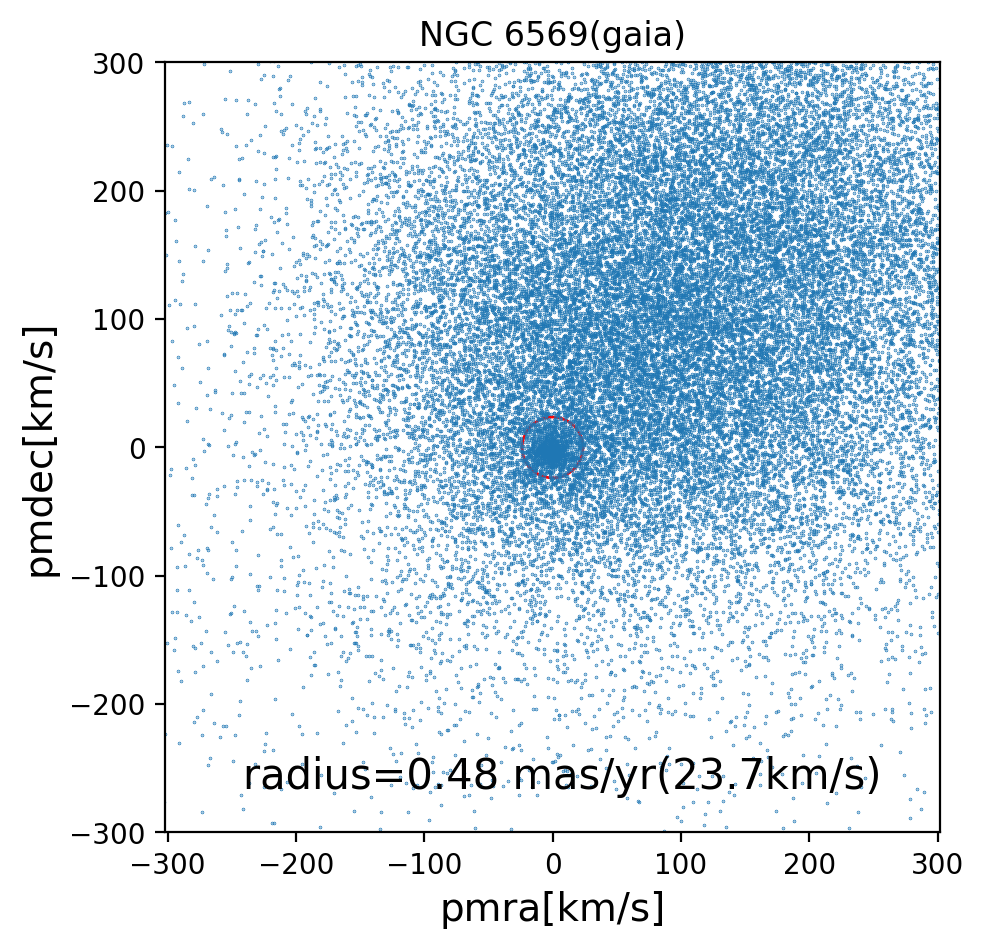

In [6]:
# Define the center and radius of the circle
plt.figure(figsize=(5,5))
center_x = -4.109
center_y = -7.267
radius = 0.5 #CHECK IN KM/S 

x = pmra_gaia_2
y = pmdec_gaia_2
# Create a scatter plot
plt.plot(47.4*(x-center_x), 47.4*(y-center_y), '.',ms=0.5, label='all points')
#plt.scatter(x,y,s=0.01)

 #Plot the circle
circle = plt.Circle((0,0), radius*47.4, fill=False, color='red')

rad =  (x - center_x)**2 + (y - center_y)**2 
wh = rad<radius**2
pmra_cluster = x[wh]
pmdec_cluster = y[wh]

plt.gca().add_patch(circle)

plt.axis('equal')
#plt.plot(x,y,color='red')
plt.xlim(-300,300)
plt.ylim(-300,300)
plt.title("NGC 6569(gaia)")
plt.xlabel("pmra[km/s]",fontsize=14)
plt.ylabel("pmdec[km/s]",fontsize=14)
plt.text(0.1,0.1, 'radius=0.48 mas/yr(23.7km/s)',fontsize=15,verticalalignment='top' ,transform = plt.gca().transAxes)
plt.show()

In [358]:
from galpy.orbit import Orbit
pmra, pmdec, distance= 1., 1., 10. #mas/yr, mas/yr, kpc
o= Orbit([10.,10.,distance,pmra,pmdec,0.],radec=True)
o.vra(), o.vdec() # km/s
#array([ 28.44282]), array([ 56.88564])

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [7]:
pmra_gaia_pm = x[wh]
pmdec_gaia_pm = y[wh]
ra_gaia_pm = ra_gaia_2[wh]
dec_gaia_pm = dec_gaia_2[wh]
pmra_gaia_pm = pmra_gaia_2[wh]
pmdec_gaia_pm = pmdec_gaia_2[wh]
bprp_gaia_pm = bprp_gaia_2[wh] 
G_gaia_pm = G_gaia_2[wh] 
mag = (G_gaia_pm>12.5) & (G_gaia_pm<19.5)
r_stars_gaia = 60*np.sqrt((ra0-ra_gaia_pm)**2 + (dec0-dec_gaia_pm)**2)
r_stars_gaia = r_stars_gaia[mag]

In [95]:
def minloglike(par, Rdat):
    # par is an array with parameters: W0 and rh, create a model with parameters par
    m = limepy(par[0], 1, M=1, rh=par[1], project=True)  # + par[2]
    
    #M=1：总质量归一化为 1
    # Return the minus log likelihood, note that the model is normalised to M=1 above #verify what 1 and M=1 m.R and m.Sigma are 
    #for emcee remove the minus, keep minus for curve fit
    #you can run curve_fit first to get the best fit params and then initialize emcee around the best fit params
     
    #print(par, -sum(numpy.log(numpy.interp(Rdat, m.R, m.Sigma, right=1e-9))) )
    return -sum(numpy.log(numpy.interp(Rdat, m.R, m.Sigma, right=1e-9))) 

def loglike_limepy(par, r_stars):
    W0,rh = par
    if (W0 < 0) | (W0> 1000) : #check the limits
        return -10**100
    if (rh < 0) : #check the limits
        return -10**100
    m = limepy(par[0], 1, M=1, rh=par[1], project=True)
    return sum(numpy.log(numpy.interp(r_stars, m.R, m.Sigma, right=1e-9)))

In [9]:
W0, rh = 5, 0.08  #数据的真实值
k = limepy(W0, 1, M=1e5, rh=rh)

In [93]:
from scipy.optimize import fmin

x0 = [8,0.08] # Starting values   PARAM:W0,rh
par = fmin(minloglike, x0, args=(r_stars_gaia,)) #start the emcee from the best fit parults 
print(" \n parult: W0_gaia = %5.3f (True=%5.3f)"%(par[0], W0),"; rh_gaia = %5.3f (True=%5.3f)"%(par[1], rh))


[8.   0.08]
[8.4  0.08]
[8.    0.084]
[7.6   0.084]
[7.6   0.088]
[7.4   0.092]
[7.8   0.092]
[7.9   0.096]
[7.3   0.104]
[6.95  0.114]
[7.45  0.118]
[7.475 0.131]
[6.525 0.149]
[7.05  0.166]
[7.1   0.192]
[8.05  0.174]
[7.675 0.235]
[7.775 0.287]
[6.825 0.305]
[7.5 0.4]
[7.7   0.504]
[8.65  0.486]
[8.575 0.703]
[8.975 0.911]
[8.025 0.929]
[7.7125 1.1505]
[8.9875 1.5575]
[9.63125 2.08425]
[8.36875 2.32375]
[8.065625 3.030125]
[9.984375 3.963875]
[9.41640625 3.26053125]
[7.85078125 4.20640625]
[6.5   3.976]
[5.04179687 4.33373438]
[6.71484375 2.79971875]
[6.146875 2.096375]
[5.14921875 3.74559375]
[3.69101562 4.10332813]
[5.3640625 2.5693125]
[3.7984375 3.5151875]
[2.34023437 3.87292188]
[3.58359375 4.69146875]
[4.91894531 3.09985156]
[3.56816406 2.86944531]
[4.75395508 3.52655664]
[5.87446289 3.1112207 ]
[6.03945312 2.68451563]
[5.07532959 3.31604639]
[4.11981201 3.30467725]
[5.43580017 3.15958484]
[5.27941589 2.94339001]
[5.12635117 3.22288229]
[5.64320602 3.28261557]
[5.10001049 3.14

In [96]:
bounds = ((None, None), (None, None))
import scipy
res = scipy.optimize.minimize(minloglike, x0, args=(r_stars_gaia,), method = 'BFGS', bounds = bounds)

c:\Users\14246\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_minimize.py:580: RuntimeWarning: Method BFGS cannot handle bounds.
  warn('Method %s cannot handle bounds.' % method,


[8.   0.08] 18588.05723899527
[8.00000001 0.08      ] 18588.05723926311
[8.         0.08000001] 18588.05661547119
[7.99956614 1.08999991] 5066.161476665828
[7.99956616 1.08999991] 5066.161476629769
[7.99956614 1.08999992] 5066.161453189311
[11.21733115  1.13114522] 6151.0485499680035
[11.21733116  1.13114522] 6151.048546003182
[11.21733115  1.13114524] 6151.048489738769
[8.02622687 1.09034082] 5065.412124036041
[8.02622689 1.09034082] 5065.412124138553
[8.02622687 1.09034083] 5065.4121008578995
[8.02428722 1.09130539] 5063.936822478841
[8.02428723 1.09130539] 5063.936822279071
[8.02428722 1.0913054 ] 5063.9367998019925
[8.01652859 1.09516366] 5058.103194254391
[8.0165286  1.09516366] 5058.103194138238
[8.01652859 1.09516368] 5058.10317164645
[7.98549408 1.11059678] 5033.522391030275
[7.98549409 1.11059678] 5033.52239188463
[7.98549408 1.1105968 ] 5033.522368280999
[7.86135603 1.17232925] 4954.887829081423
[7.86135605 1.17232925] 4954.887828378559
[7.86135603 1.17232926] 4954.8878125313

In [99]:
print('-loglikelihood=', res.fun) #for best fit params

-loglikelihood= 4417.384885001507


In [100]:
print('best fit params', res.x)

best fit params [5.5773713  3.17198033]


In [11]:
W0, g = 5.253,1 #king model:g=1

In [12]:
k = limepy(W0, g, verbose=True)


 Model properties: 
 ----------------- 
 phi0 =  5.25; g = 1.00
 Converged = True
 M =  1.294e+01; U = -2.279e+01; K = 1.140e+01; Q = 0.5000;  2Kr/Kt = 1.000
 rv/rh = 1.234; rh/r0 =  2.131; rt/r0 =  12.088; ra/rh = 46916805.135


Text(0.5, 1.0, 'NGC6569')

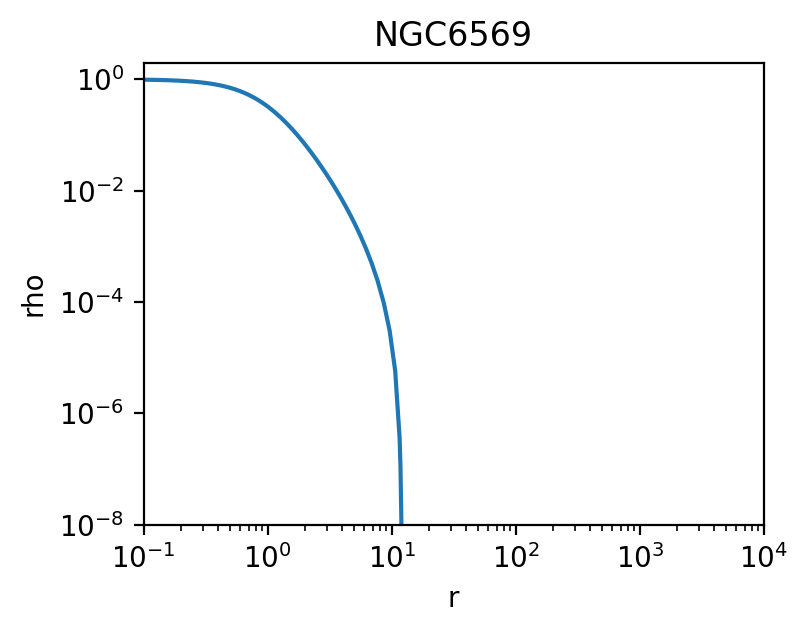

In [14]:
%matplotlib inline
import matplotlib, numpy
import matplotlib.pyplot as plt
plt.figure(figsize=(4,3))
plt.loglog()
plt.axis([1e-1, 1e4, 1e-8,2])
plt.plot(k.r, k.rho)
plt.xlabel('r')
plt.ylabel('rho')
plt.title('NGC6569')

Text(0.5, 1.0, 'NGC6569')

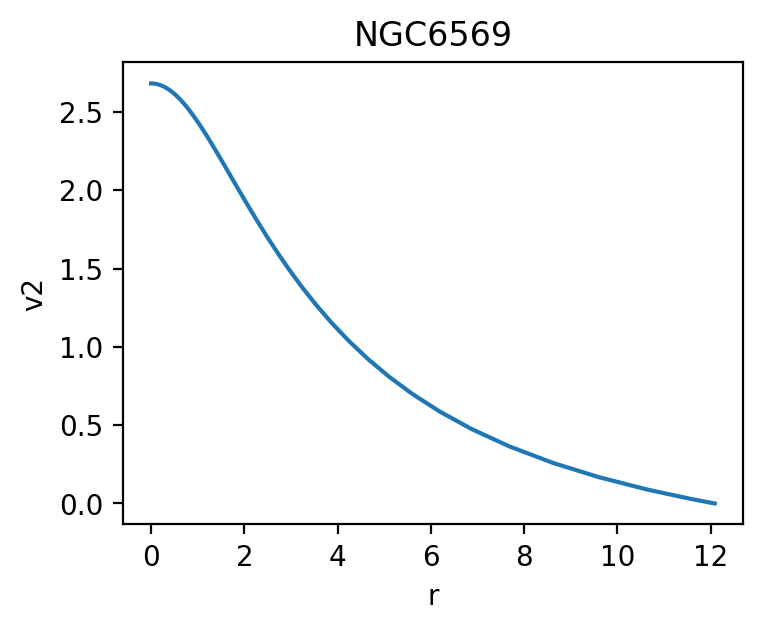

In [15]:
plt.figure(figsize=(4,3))
plt.plot(k.r, k.v2)
plt.xlabel('r')
plt.ylabel('v2')
plt.title('NGC6569')

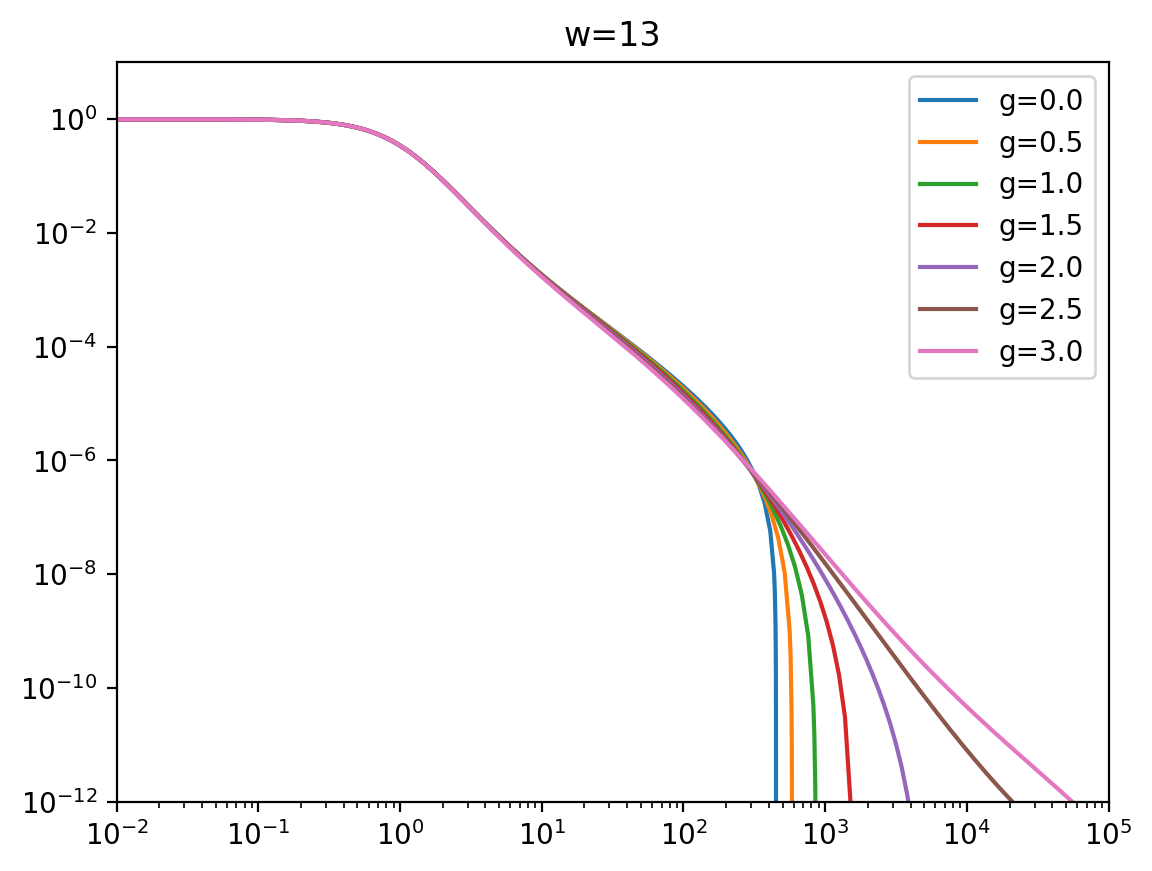

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from limepy import limepy
import numpy
plt.loglog()
plt.axis([1e-2, 1e5, 1e-12, 1e1])
g = numpy.linspace(0,3,7)
for i in range(len(g)):
    m = limepy(13, g[i])
    plt.plot(m.r, m.rho, label=f"g={g[i]}")  # 添加标签

plt.legend()  # 创建图例
plt.title('w=13')
plt.show()

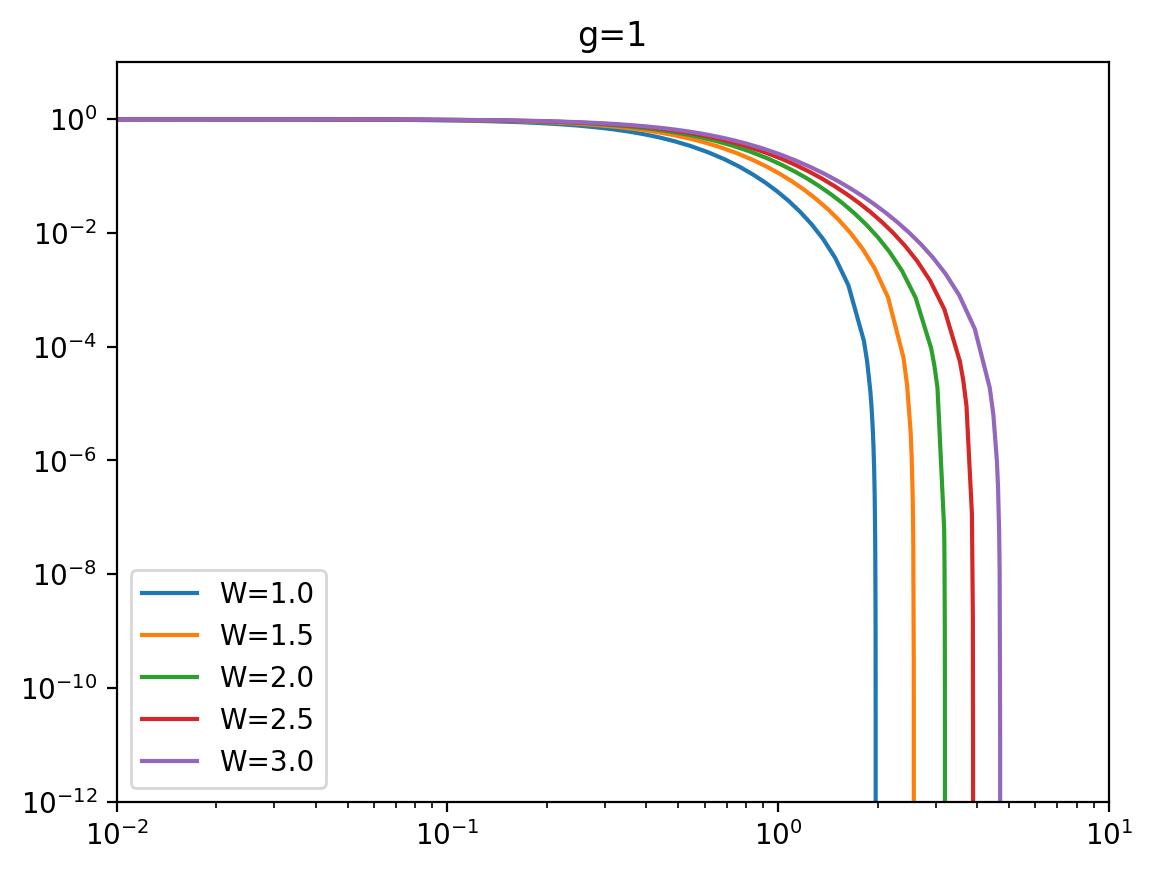

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from limepy import limepy
import numpy
plt.loglog()
plt.axis([1e-2, 1e1, 1e-12, 1e1])
W = numpy.linspace(1,3,5)
for i in range(len(W)):
    m = limepy(W[i], 1)
    plt.plot(m.r, m.rho, label=f"W={W[i]}")  # 添加标签

plt.legend()  # 创建图例
plt.title('g=1')
plt.show()

In [18]:
import emcee
# 初始化步长
nwalkers = 100
ndim_limepy = 2  

initial_par = [par + 1e-4 * np.random.randn(ndim_limepy) for _ in range(nwalkers)]
W0_param = np.random.uniform(low=10, high=30, size=nwalkers)
g_param = np.random.normal(loc=par[1], scale=0.1, size=nwalkers)

pos_limepy = np.vstack((W0_param,g_param)).T   
nwalkers, ndim_limepy = pos_limepy.shape
sampler_limepy = emcee.EnsembleSampler(nwalkers, ndim_limepy, loglike_limepy, args=(r_stars_gaia,))
sampler_limepy.run_mcmc(pos_limepy, 5000, progress=True)
samples_limepy = sampler_limepy.get_chain()
print('样本链：', samples_limepy)

emcee: Exception while calling your likelihood function:
  params: [26.46515434  3.01793304]
  args: (<Column name='ra' dtype='float64' unit='deg' length=948>
8.546042342429804
8.754212413973654
8.217688942734581
8.087023657744723
 8.30441972123376
 8.01346402196266
8.227900391895743
7.748644907262014
8.170806438151528
7.535633019430177
 7.62714364128761
  8.0918224613779
              ...
7.885677752697024
8.936482611082738
8.527953442205963
8.293580730163036
8.643089197945098
7.996532138645472
8.394287012671239
8.893729923392437
8.919253478665462
8.983587379961454
8.671786990456225
8.996509236317177,)
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "c:\Users\14246\AppData\Local\Programs\Python\Python311\Lib\site-packages\emcee\ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\14246\AppData\Local\Temp\ipykernel_14828\3541184535.py", line 15, in loglike_limepy
    m = limepy(par[0], 1, M=1, rh=par[1], project=True)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\14246\AppData\Local\Programs\Python\Python311\Lib\site-packages\astro_limepy-1.1-py3.11.egg\limepy\limepy.py", line 221, in __init__
    if (self.project): self._project()
                       ^^^^^^^^^^^^^^^
  File "c:\Users\14246\AppData\Local\Programs\Python\Python311\Lib\site-packages\astro_limepy-1.1-py3.11.egg\limepy\limepy.py", line 911, in _project
    Sigma[i] = 2.0*abs(simps(self.rho[c], x=z))
                       ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\14246\AppData\Local\Programs\Python\Python3

KeyboardInterrupt: 

In [ ]:
import numpy as np
import emcee
from limepy import limepy
import matplotlib.pyplot as plt

def loglike_limepy(par, r_stars):
    W0, rh = par
    if W0 <= 0 or rh <= 0:
        return -np.inf  
    try:
        m = limepy(W0, 1, M=1, rh=rh, project=True)
        R = np.asarray(m.R)
        Sigma = np.asarray(m.Sigma)
        if R.ndim != 1 or Sigma.ndim != 1:
            return -np.inf
        interp_values = np.interp(r_stars, R, Sigma, right=1e-9)
        return np.sum(np.log(interp_values))
    except Exception as e:
        return -np.inf  
nwalkers = 100
ndim_limepy = 2  

W0_param = np.random.uniform(low=1, high=30, size=nwalkers)  # W0 >0
rh_param = np.random.uniform(low=0.1, high=10, size=nwalkers)  # rh >0

pos_limepy = np.vstack((W0_param, rh_param)).T
sampler_limepy = emcee.EnsembleSampler(nwalkers, ndim_limepy, loglike_limepy, args=(r_stars,))
sampler_limepy.run_mcmc(pos_limepy, 5000, progress=True)
samples_limepy = sampler_limepy.get_chain()
print('样本链：', samples_limepy)

fig, axes = plt.subplots(ndim_limepy, figsize=(10, 7), sharex=True)
labels = ["W0", "rh"]
for i in range(ndim_limepy):
    ax = axes[i]
    ax.plot(samples_limepy[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples_limepy))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("步数")
plt.show()

  3%|▎         | 146/5000 [58:11<14:09:29, 10.50s/it]  c:\Users\14246\AppData\Local\Programs\Python\Python311\Lib\site-packages\astro_limepy-1.1-py3.11.egg\limepy\limepy.py:702: RuntimeWarning: overflow encountered in scalar multiply
  P = self.alpha[j]*self.s2j[j]*2*pi*x**2*rv2/self.rhoint0[j]
c:\Users\14246\AppData\Local\Programs\Python\Python311\Lib\site-packages\astro_limepy-1.1-py3.11.egg\limepy\limepy.py:705: RuntimeWarning: overflow encountered in scalar multiply
  Pr = self.alpha[j]*self.s2j[j]*2*pi*x**2*rv2r/self.rhoint0[j]
c:\Users\14246\AppData\Local\Programs\Python\Python311\Lib\site-packages\astro_limepy-1.1-py3.11.egg\limepy\limepy.py:455: RuntimeWarning: divide by zero encountered in scalar divide
  p = 2*sol.y[0]*self.r[-1]/GM
c:\Users\14246\AppData\Local\Programs\Python\Python311\Lib\site-packages\astro_limepy-1.1-py3.11.egg\limepy\limepy.py:458: RuntimeWarning: invalid value encountered in scalar divide
  rtfac = (1 - sqrt(1-2*p))/p
  9%|▊         | 434/5000 [16:34:39

emcee: Exception while calling your likelihood function:
  params: [57.13781785  1.34626925]
  args: (array([1, 2, 3]),)
  kwargs: {}
  exception:


KeyboardInterrupt: 

In [ ]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.modeling import models
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils.aperture import CircularAperture
from photutils.detection import DAOStarFinder
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from scipy.optimize import curve_fit
from scipy.optimize import minimize 
import os
'''
def Surface_density(annulii):
    area = np.pi*(annulii[1][1:]**2 - annulii[1][:-1]**2)
    surf_dens = annulii[0]/area
    annulli_cent = np.convolve(annulii[1],np.array([0.5, 0.5]), mode= 'valid')
    errors = np.sqrt(annulii[0])/area
    return surf_dens, errors , annulli_cent

def King_model(r, n_0, alpha, gamma):
    return n_0*(1+(r/alpha)**2)**(-gamma/2)

def King_model_fit(radii, surf_dens, initial_vals, errors):
    fit_param, statis = curve_fit(King_model, radii, surf_dens, initial_vals, sigma=errors)
    model = King_model(radii, *fit_param) 
    return model, fit_param 
'''

"\ndef Surface_density(annulii):\n    area = np.pi*(annulii[1][1:]**2 - annulii[1][:-1]**2)\n    surf_dens = annulii[0]/area\n    annulli_cent = np.convolve(annulii[1],np.array([0.5, 0.5]), mode= 'valid')\n    errors = np.sqrt(annulii[0])/area\n    return surf_dens, errors , annulli_cent\n\ndef King_model(r, n_0, alpha, gamma):\n    return n_0*(1+(r/alpha)**2)**(-gamma/2)\n\ndef King_model_fit(radii, surf_dens, initial_vals, errors):\n    fit_param, statis = curve_fit(King_model, radii, surf_dens, initial_vals, sigma=errors)\n    model = King_model(radii, *fit_param) \n    return model, fit_param\n    \n"

In [68]:
#################
### Functions ###
#################
def Data_analysis(initial_data):
    masked_data = ma.masked_invalid(initial_data)
    median = ma.median(masked_data)
    corrected_data = initial_data - median
    return corrected_data
    
def Gaussian(x, height, x_center, std, offset):
    return(height * (np.exp(-((x-x_center)**2 / (2*std**2)))) + offset)

def Gaussian_fit(x_axis, y_axis, initial_vals):
    fit_param, statis = curve_fit(Gaussian, x_axis, y_axis, initial_vals)
    model = Gaussian(x_axis, *fit_param) 
    return model, fit_param
def Surface_density(annulii):
    area = np.pi*(annulii[1][1:]**2 - annulii[1][:-1]**2)
    surf_dens = annulii[0]/area
    annulli_cent = np.convolve(annulii[1],np.array([0.5, 0.5]), mode= 'valid')
    errors = np.sqrt(annulii[0])/area
    return surf_dens, errors , annulli_cent
'''
def King_model(r, params):
    n_0, alpha, gamma = params 
    return n_0*(1+(r/alpha)**2)**(-gamma/2)'''
def King_model(r, n_0, alpha, gamma,b):
    return n_0*(1+(r/alpha)**2)**(-gamma/2)+b

def King_model_fit(radii, surf_dens, initial_vals, errors):
    #add bounds inside curvefit
    #test the bounds 
    #test scipy.optimize.minimize with the BFGS method
    #method ='BFGS' 
    # print the result res.x 
    fit_param, statis = curve_fit(King_model, radii, surf_dens, initial_vals, sigma=errors)
    pcov = statis 
    model = King_model(radii, *fit_param) 
    errors_on_params =  np.sqrt(np.diag(pcov))
    
    return model, fit_param, errors_on_params
'''
def King_model_fit(radii, surf_dens, initial_vals, errors):
    def func_to_fit(r, n_0, alpha, gamma, b):
        return King_model(r, n_0, alpha, gamma, b)
    
    # Perform the fitting
    fit_param, _ = curve_fit(func_to_fit, radii, surf_dens, p0=initial_vals, sigma=errors)
    
    # Check if alpha is positive, if not, return None
    if fit_param[1] <= 0:
        return None, None
    
    model = King_model(radii, *fit_param) 
    return model, fit_param
    '''
#################################     param = n_0, alpha, gamma,b    #################
def likelihood(n_0, alpha, gamma,b, r_stars_arc):
    annulii = np.histogram(r_stars_arc, bins=40)
    surf_dens, numb_error , radii = Surface_density(annulii)
    model =  King_model(radii, n_0, alpha, gamma,b) 
    chi_square = np.sum(((model - surf_dens) ** 2) / (numb_error ** 2))
    likelihood = np.exp(-0.5 * chi_square)
    return likelihood

def log_likelihood_fn(params, r_stars_arc):
    n_0, alpha, gamma,b  = params #check these 
    if (alpha < 0) | (alpha> 100) : #check the limits
        return -10**100
    if (gamma > 500) : #check the limits
        return -10**100
    annulii = np.histogram(r_stars_arc, bins=40)
    surf_dens, numb_error, radii = Surface_density(annulii)
    model = King_model(radii, n_0, alpha, gamma,b)
    chi_square = np.sum(((model - surf_dens) ** 2) / (numb_error ** 2))
    log_likelihood = -0.5 * chi_square
    print('log_likelihood:',log_likelihood)
    return log_likelihood

def log_likelihood_fn_allsurveys(params, r_stars_arc_bdbs,r_stars_arc_hst,r_stars_arc_gaia ):
    n_0_bdbs, n_0_hst, n_0_gaia, b_bdbs, b_hst, b_gaia, alpha, gamma = params

    if (n_0_bdbs < 0) | (n_0_bdbs> 1000) : #check the limits
        return -10**100
    if (rh < 0) : #check the limits
        return -10**100
    
    #do this 3 times for 3 surveys 
    annulii_bdbs = np.histogram(r_stars_arc_bdbs, bins=40)
    annulii_hst = np.histogram(r_stars_arc_hst,bins=40)
    annulii_gaia = np.histogram(r_stars_arc_gaia,bins=40)
 
    surf_dens_bdbs, numb_error_bdbs, radii_bdbs = Surface_density(annulii_bdbs)
    surf_dens_hst, numb_error_hst, radii_hst = Surface_density(annulii_hst)
    surf_dens_gaia, numb_error_gaia, radii_gaia = Surface_density(annulii_gaia)

    model_bdbs = King_model(radii_bdbs, n_0_bdbs, alpha, gamma) + b_bdbs
    model_hst = King_model(radii_hst, n_0_hst, alpha, gamma) + b_hst
    model_gaia = King_model(radii_gaia, n_0_gaia, alpha, gamma) + b_gaia

    #make a big array
    model = np.hstack((model_bdbs, model_hst, model_gaia)) #one long array, try concatenate 
    surf_dens = np.concatenate((surf_dens_bdbs, surf_dens_gaia, surf_dens_hst))
    numb_error = np.hstack((numb_error_bdbs,numb_error_hst,numb_error_gaia ))

    #add constraints on the parameters as in the limepy function
    #add 3 bgk varabiales
    chi_square = np.sum(((model - surf_dens) ** 2) / (numb_error ** 2))
    log_likelihood = -0.5 * chi_square
    return log_likelihood

def loglike_limepy(par, r_stars_arc):
    # par is an array with parameters: W0 and rh, create a model with parameters par
    m = limepy(par[0], 1, M=1, rh=par[1], project=True)
    # Return the minus log likelihood, note that the model is normalised to M=1 above #verify what 1 and M=1 m.R and m.Sigma are 
    #for emcee remove the minus, keep minus for curve fit
    #you can run curve_fit first to get the best fit params and then initialize emcee around the best fit params 
    return sum(numpy.log(numpy.interp(r_stars_arc, m.R, m.Sigma, right=1e-9)))


def minloglike_allsurveys(par, r_stars_arc_bdbs,r_stars_arc_hst,r_stars_arc_gaia):
    W0_bdbs, W0_hst,W0_gaia, rh_bdbs, rh_hst, rh_gaia = par
    
    m_bdbs = limepy(W0_bdbs, 1, M=1, rh=rh_bdbs, project=True)
    m_hst = limepy(W0_hst, 1, M=1, rh=rh_hst, project=True)
    m_gaia = limepy(W0_gaia, 1, M=1, rh=rh_gaia, project=True)
    
    log_likelihood_bdbs = -np.sum(np.log(np.interp(r_stars_arc_bdbs, m_bdbs.R, m_bdbs.Sigma, right=1e-9)))
    log_likelihood_hst = -np.sum(np.log(np.interp(r_stars_arc_hst, m_hst.R, m_hst.Sigma, right=1e-9)))
    log_likelihood_gaia = -np.sum(np.log(np.interp(r_stars_arc_gaia, m_gaia.R, m_gaia.Sigma, right=1e-9)))
    

    total_log_likelihood = log_likelihood_gaia + log_likelihood_bdbs + log_likelihood_hst
    return total_log_likelihood

#run curvefit on limepy
#run mcmc on limepy
#goal: find and compare the same parameters with literature and compare the two models 
#compare 

In [14]:
#读取BDBS数据
t_VVV_NGC6569 = Table.read('D:/Astronomy/aaaaawork/gaia/globular_cluster/NGC6569/NGC6569_vvv_all.fits',format='fits')
ra_bdbs = t_VVV_NGC6569['ra']
dec_bdbs = t_VVV_NGC6569['dec']
pmra_bdbs = t_VVV_NGC6569['pmra']
pmdec_bdbs = t_VVV_NGC6569['pmdec']
gmag = t_VVV_NGC6569['gmag']
imag = t_VVV_NGC6569['imag']
r_stars_bdbs = 60*np.sqrt((ra0-ra_bdbs)**2 + (dec0-dec_bdbs)**2) #arcmin
r_bdbs= 0.55*60
radec = r_stars_bdbs < 9
gmag_2 = gmag[radec]
imag_2 = imag[radec]
select_bdbs =(r_stars_bdbs >1) & (r_stars_bdbs < 9) & (gmag > 16) & (gmag < 20.5)
r_stars_bdbs = r_stars_bdbs[select_bdbs]
ra_bdbs_2 = ra_bdbs[select_bdbs]
dec_bdbs_2 = dec_bdbs[select_bdbs]

#读取HST数据
from astropy.table import Table
NGC6569_hst=Table.read('D:/Astronomy/aaaaawork/gaia/globular_cluster/NGC6569/NGC6569hst_gaia.fits',format="fits")
ra_hst = NGC6569_hst['matchra'] #deg
dec_hst = NGC6569_hst['matchdec'] #deg
f606w = NGC6569_hst['a_f606w']
f160w = NGC6569_hst['w3_f160w']
pmra_hst = NGC6569_hst['pmra']
pmdec_hst = NGC6569_hst['pmdec']

r_stars_hst = 60*np.sqrt((ra0-ra_hst)**2 + (dec0-dec_hst)**2) #arcmin
r_hst= 0.028*60
rad_hst =  (pmra_hst - center_x)**2 + (pmdec_hst - center_y)**2 
radec_hst = r_stars_hst < 9
f606w_2 = f606w[radec_hst]
f160w_2 = f160w[radec_hst]
select_hst = (r_stars_hst < 9) & (f606w > 16) & (f606w < 25.5)&(rad_hst<0.5**2)
r_stars_hst = r_stars_hst[select_hst]
ra_hst_2 = ra_hst[select_hst]
dec_hst_2 = dec_hst[select_hst]

#new hst data
NGC6569_hst2 = Table.read('D:/Astronomy/aaaaawork/gaia/globular_cluster/NGC6569/acs_sdens.dat', format='ascii', delimiter=' ')
r_cent_annulii_hst2 = NGC6569_hst2['col1']/60  #arcsecond to arcmin
n_star_annulii = NGC6569_hst2['col2']
surf_dens_hst2 = NGC6569_hst2['col4']
error_hst2 = NGC6569_hst2['col5']

In [15]:
plt.style.use('default')  # 恢复默认风格
plt.rcParams.update(plt.rcParamsDefault)  # 更新为默认参数


C:\Users\14246\AppData\Local\Temp\ipykernel_19620\2278879815.py:44: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  axs[2].legend(loc=2, frameon = False,fontsize=14)


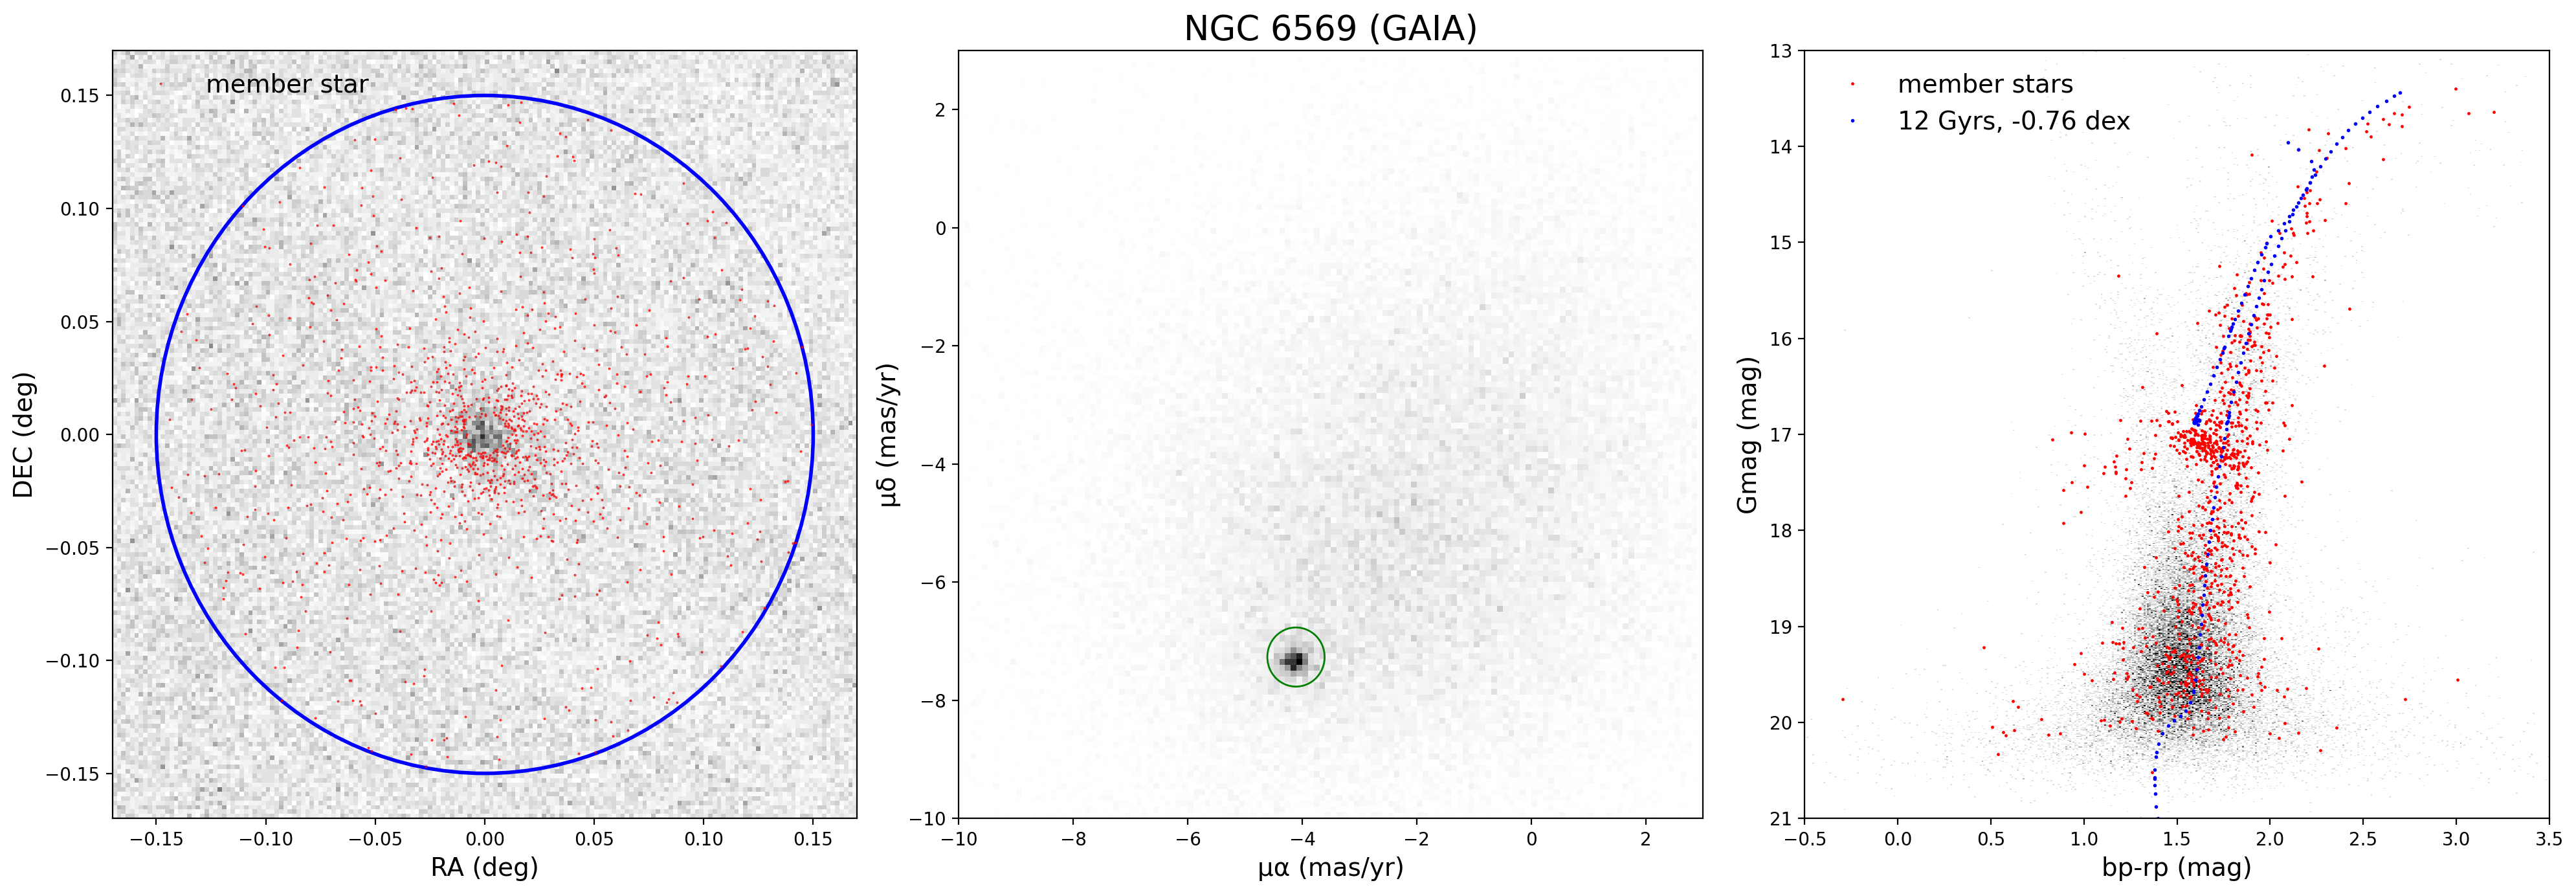

In [16]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(1,3, figsize=(20,7))  
ra0=273.412
dec0=-31.826

axs[0].hist2d(ra_gaia-ra0, dec_gaia-dec0, cmap='Greys', bins=(np.arange(-0.2,0.2, 0.002), np.arange(-0.2,0.2, 0.002)), vmin=0,vmax = 20)
axs[0].plot(ra_gaia_pm - ra0,dec_gaia_pm-dec0 ,'.', c='red' , ms=0.7,label='member star')
axs[0].set_xlim(-0.17,0.17)
axs[0].set_ylim(-0.17,0.17)
axs[0].legend(loc=2, frameon = False,fontsize=14)
axs[0].set_xlabel('RA (deg)',fontsize=14)
axs[0].set_ylabel('DEC (deg)',fontsize=14)


circle = plt.Circle((0, 0), 0.15, fill=False, color='blue', lw = 2)
axs[0].add_patch(circle)
#axs[0].text(0, 0, 'r = 9arcmin', fontsize=15, verticalalignment='top', transform=axs[0].transAxes)

radius = 0.5 
center_x = -4.109
center_y = -7.267
axs[1].hist2d(pmra_gaia_2 , pmdec_gaia_2 ,  cmap='Greys',bins=(np.arange(-10,3, 0.1), np.arange(-15,3, 0.1)))
axs[1].set_xlim(-10,3)
axs[1].set_ylim(-10,3)
axs[1].set_title('NGC 6569 (GAIA)',fontsize=19)
axs[1].set_xlabel('\u03BC\u03B1 (mas/yr)',fontsize=14)
axs[1].set_ylabel('\u03BC\u03B4 (mas/yr)',fontsize=14)
circle = plt.Circle((center_x, center_y), radius, fill=False, color='green')
axs[1].add_patch(circle)
#axs[1].text(0.1, 0.1, 'r=0.5 mas/yr (23.7 km/s)', fontsize=15, verticalalignment='top', transform=axs[1].transAxes)

cmd = Table.read('D:/Astronomy/aaaaawork/gaia/globular_cluster/NGC6569/NGC6569_isochrone_EDR3.txt',format="ascii.commented_header",header_start=14)#读取cmd的拟合isochrone数据
bp_rp_isochrone= cmd["G_BPmag"]-cmd["G_RPmag"] #isochrone
Gmag_isochrone = cmd["Gmag"]+5*np.log10(10530)-5
axs[2].plot(bprp_gaia_pm, G_gaia_pm, '.', ms=1.5,c='red',label='member stars')
axs[2].plot(bp_rp_isochrone, Gmag_isochrone, '.', ms=2,c='blue', label='12 Gyrs, -0.76 dex')
axs[2].hist2d(bprp_gaia_2, G_gaia_2,  cmap='Greys',bins=(np.arange(-6,8, 0.01), np.arange(8,22, 0.01)), vmin = 0, vmax = 5,label = 'field stars')
axs[2].set_xlabel('bp-rp (mag)',fontsize=14)
axs[2].set_ylabel('Gmag (mag)',fontsize=14)
#axs[2].invert_yaxis()
#axs[2].axhline(y=12.5, color='gray', linestyle='--')
#axs[2].axhline(y=19.5, color='gray', linestyle='--')
axs[2].legend(loc=2, frameon = False,fontsize=14)
axs[2].set_xlim(-0.5,3.5)
axs[2].set_ylim(21,13)

plt.tight_layout() 
plt.show()


C:\Users\14246\AppData\Local\Temp\ipykernel_19620\3303332591.py:39: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  axs[2].legend(loc=2, frameon = False,fontsize=14)


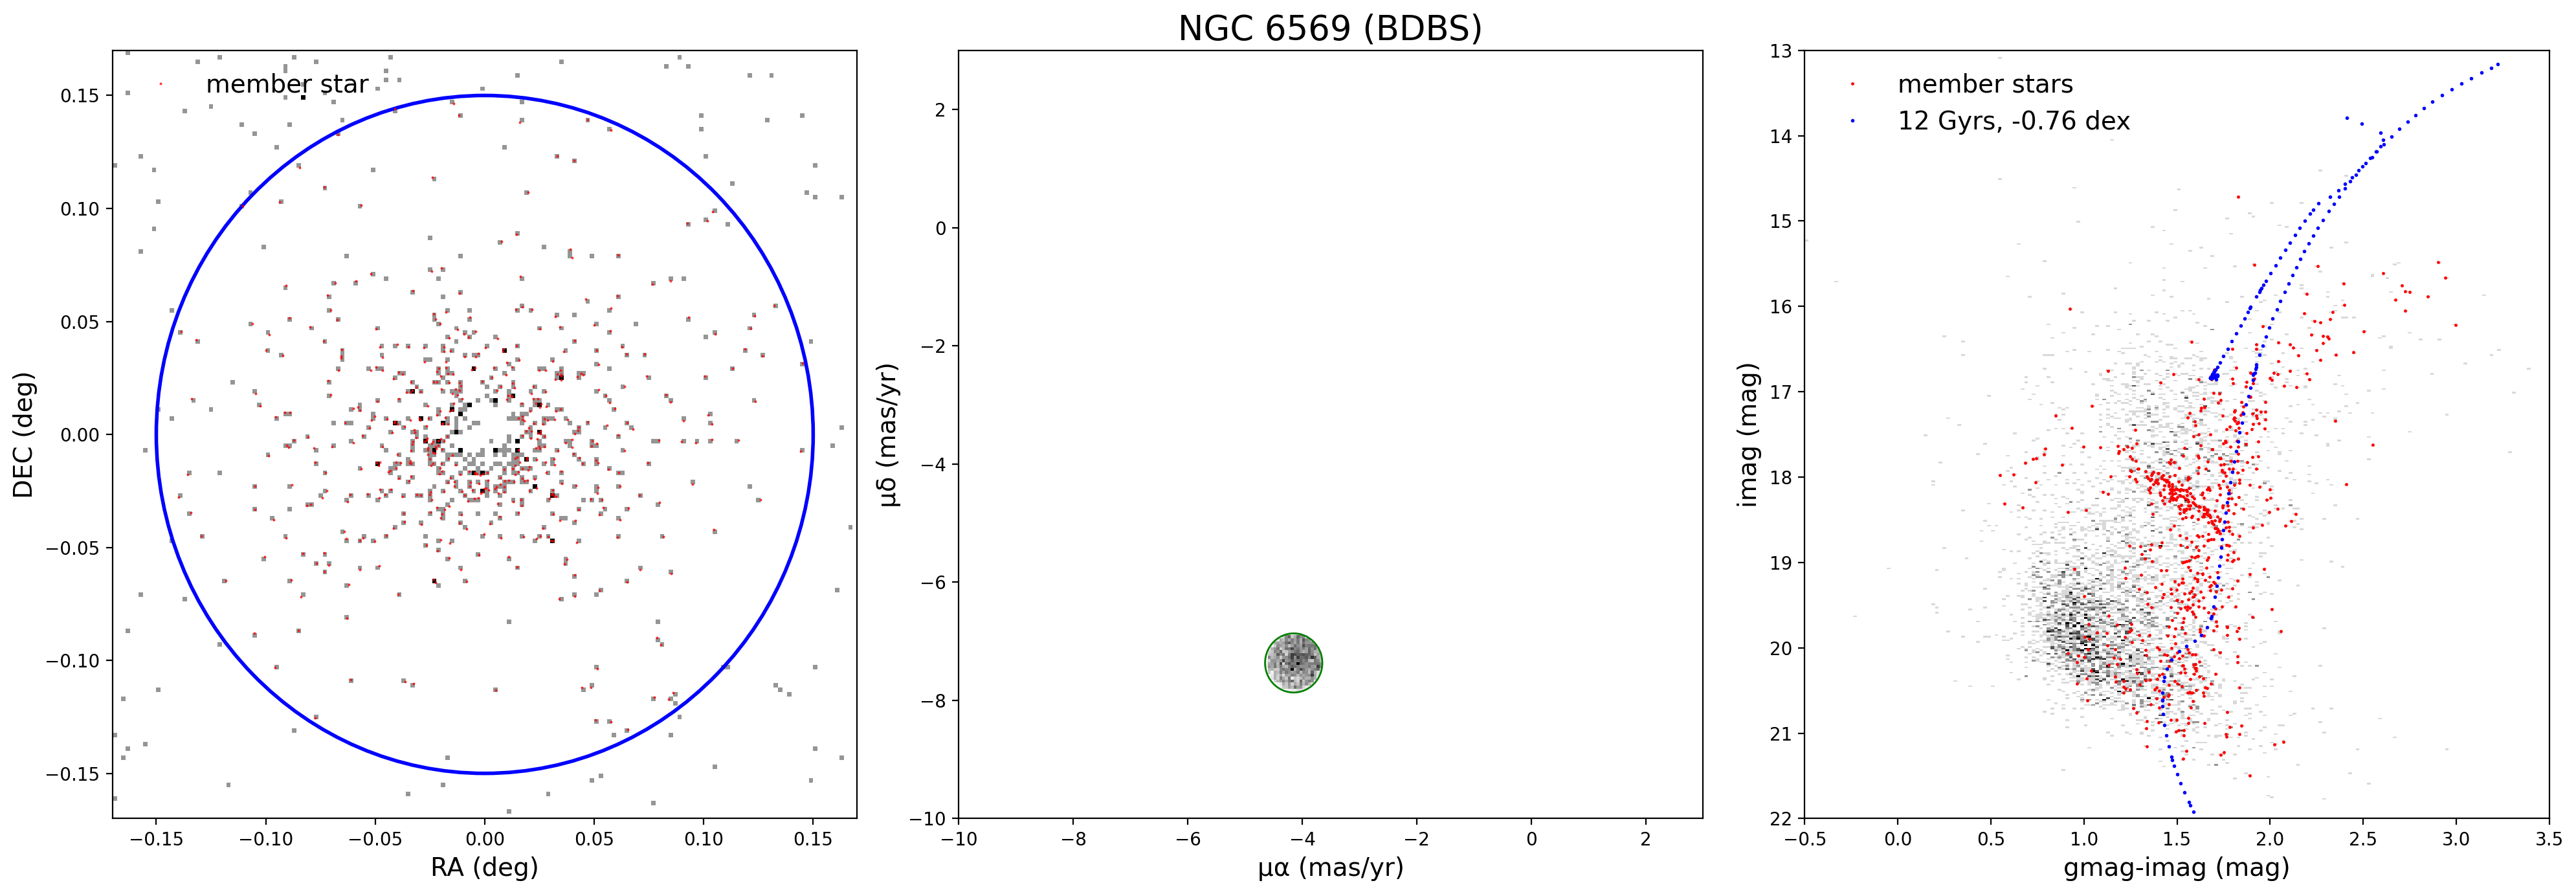

In [17]:
fig, axs = plt.subplots(1,3, figsize=(20,7))  
ra0=273.412
dec0=-31.826

axs[0].hist2d(ra_bdbs-ra0, dec_bdbs-dec0, cmap='Greys', bins=(np.arange(-0.2,0.2, 0.002), np.arange(-0.2,0.2, 0.002)), vmin=0,vmax =2)
axs[0].plot(ra_bdbs_2 - ra0,dec_bdbs_2-dec0 ,'.', c='red' , ms=0.7,label='member star')
axs[0].set_xlim(-0.17,0.17)
axs[0].set_ylim(-0.17,0.17)
axs[0].set_xlabel('RA (deg)',fontsize=14)
axs[0].set_ylabel('DEC (deg)',fontsize=14)
axs[0].legend(loc=2, frameon = False,fontsize=14)
circle = plt.Circle((0, 0), 0.15, fill=False, color='blue', lw = 2)
axs[0].add_patch(circle)

radius = 0.5 
center_x = -4.149
center_y = -7.367
axs[1].hist2d(pmra_bdbs , pmdec_bdbs ,  cmap='Greys',bins=(np.arange(-10,3, 0.05), np.arange(-15,3, 0.05)))
axs[1].set_xlim(-10,3)
axs[1].set_ylim(-10,3)
axs[1].set_title('NGC 6569 (BDBS)',fontsize=19)
axs[1].set_xlabel('\u03BC\u03B1 (mas/yr)',fontsize=14)
axs[1].set_ylabel('\u03BC\u03B4 (mas/yr)',fontsize=14)
circle = plt.Circle((center_x, center_y), radius, fill=False, color='green')
axs[1].add_patch(circle)


cmd_2 = Table.read('D:/Astronomy/aaaaawork/gaia/globular_cluster/NGC6569/NGC6569_bdbs_isochrone.txt',format="ascii.commented_header",header_start=14)#读取cmd的拟合isochrone数据
g_isochrone = cmd_2['gP1mag']+5*np.log10(10530)-5
i_isochrone = cmd_2['iP1mag']+5*np.log10(10530)-5
axs[2].plot(gmag_2-imag_2, gmag_2, '.', ms=1.5,c='red',label='member stars')
axs[2].hist2d(gmag-imag, gmag,  cmap='Greys',bins=(np.arange(-6,3.5, 0.02), np.arange(8,22, 0.02)), vmin = 0, vmax =4 ,label = 'field stars')
axs[2].plot(g_isochrone-i_isochrone, i_isochrone, '.', ms=2,c='blue', label='12 Gyrs, -0.76 dex')
axs[2].set_xlabel('gmag-imag (mag)',fontsize=14)
axs[2].set_ylabel('imag (mag)',fontsize=14)
#axs[2].invert_yaxis()
#axs[2].axhline(y=12.5, color='gray', linestyle='--')
#axs[2].axhline(y=19.5, color='gray', linestyle='--')
axs[2].legend(loc=2, frameon = False,fontsize=14)
axs[2].set_xlim(-0.5,3.5)
axs[2].set_ylim(22,13)

plt.tight_layout() 
plt.show()


C:\Users\14246\AppData\Local\Temp\ipykernel_19620\2833735238.py:25: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  axs[1].legend(loc=2, frameon = False,fontsize = 14)


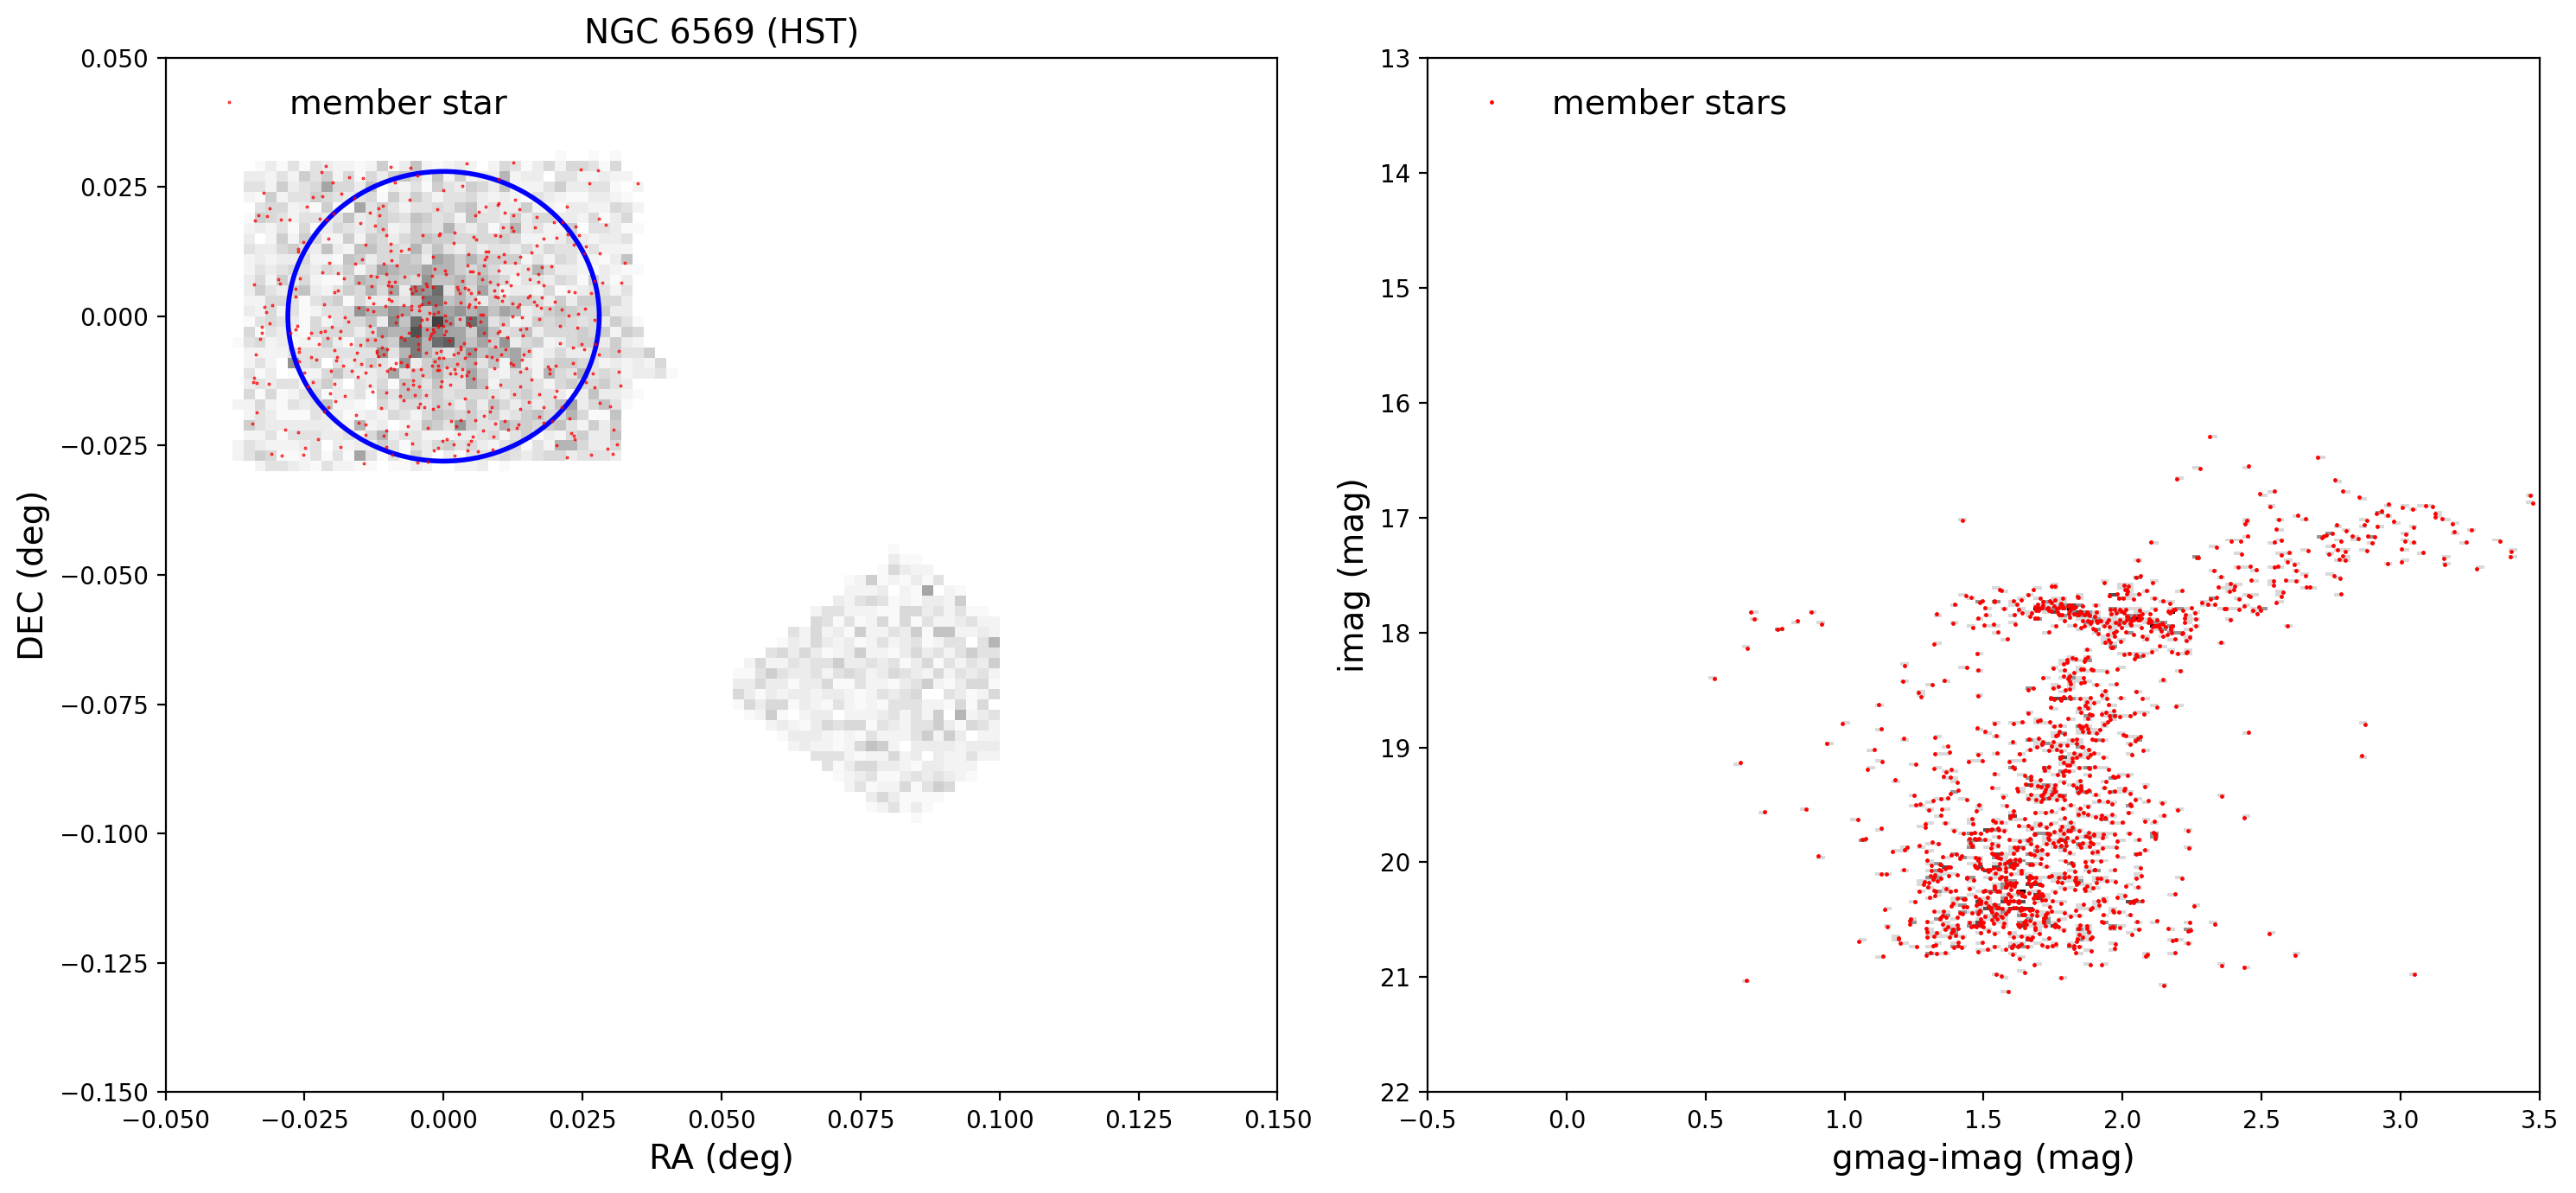

In [18]:
fig, axs = plt.subplots(1,2, figsize=(15,7))  
ra0=273.412
dec0=-31.826

axs[0].hist2d(ra_hst-ra0, dec_hst-dec0, cmap='Greys', bins=(np.arange(-0.2,0.2, 0.002), np.arange(-0.2,0.2, 0.002)), vmin=0,vmax =20)
axs[0].plot(ra_hst_2 - ra0,dec_hst_2-dec0 ,'.', c='red' , ms=0.7,label='member star')
axs[0].set_xlim(-0.05,0.15 )
axs[0].set_ylim(-0.15,0.05)
axs[0].set_xlabel('RA (deg)',fontsize=14)
axs[0].set_ylabel('DEC (deg)',fontsize=14)
axs[0].legend(loc=2, frameon = False,fontsize = 14)
circle = plt.Circle((0, 0), 0.028, fill=False, color='blue', lw = 2)
axs[0].add_patch(circle)
axs[0].set_title('NGC 6569 (HST)',fontsize=14)

f606w = NGC6569_hst['a_f606w']
f160w = NGC6569_hst['w3_f160w']
axs[1].plot(f606w_2-f160w_2, f606w_2, '.', ms=1.5,c='red',label='member stars')
axs[1].hist2d(f606w-f160w, f606w,  cmap='Greys',bins=(np.arange(-6,3.5, 0.03), np.arange(8,22, 0.03)), vmin = 0, vmax =4,label = 'field stars')
axs[1].set_xlabel('gmag-imag (mag)',fontsize=14)
axs[1].set_ylabel('imag (mag)',fontsize=14)
#axs[1].invert_yaxis()
#axs[1].axhline(y=12.5, color='gray', linestyle='--')
#axs[1].axhline(y=19.5, color='gray', linestyle='--')
axs[1].legend(loc=2, frameon = False,fontsize = 14)
axs[1].set_xlim(-0.5,3.5)
axs[1].set_ylim(22,13)

plt.tight_layout() 
plt.show()

In [19]:
0.53*3.1

1.6430000000000002

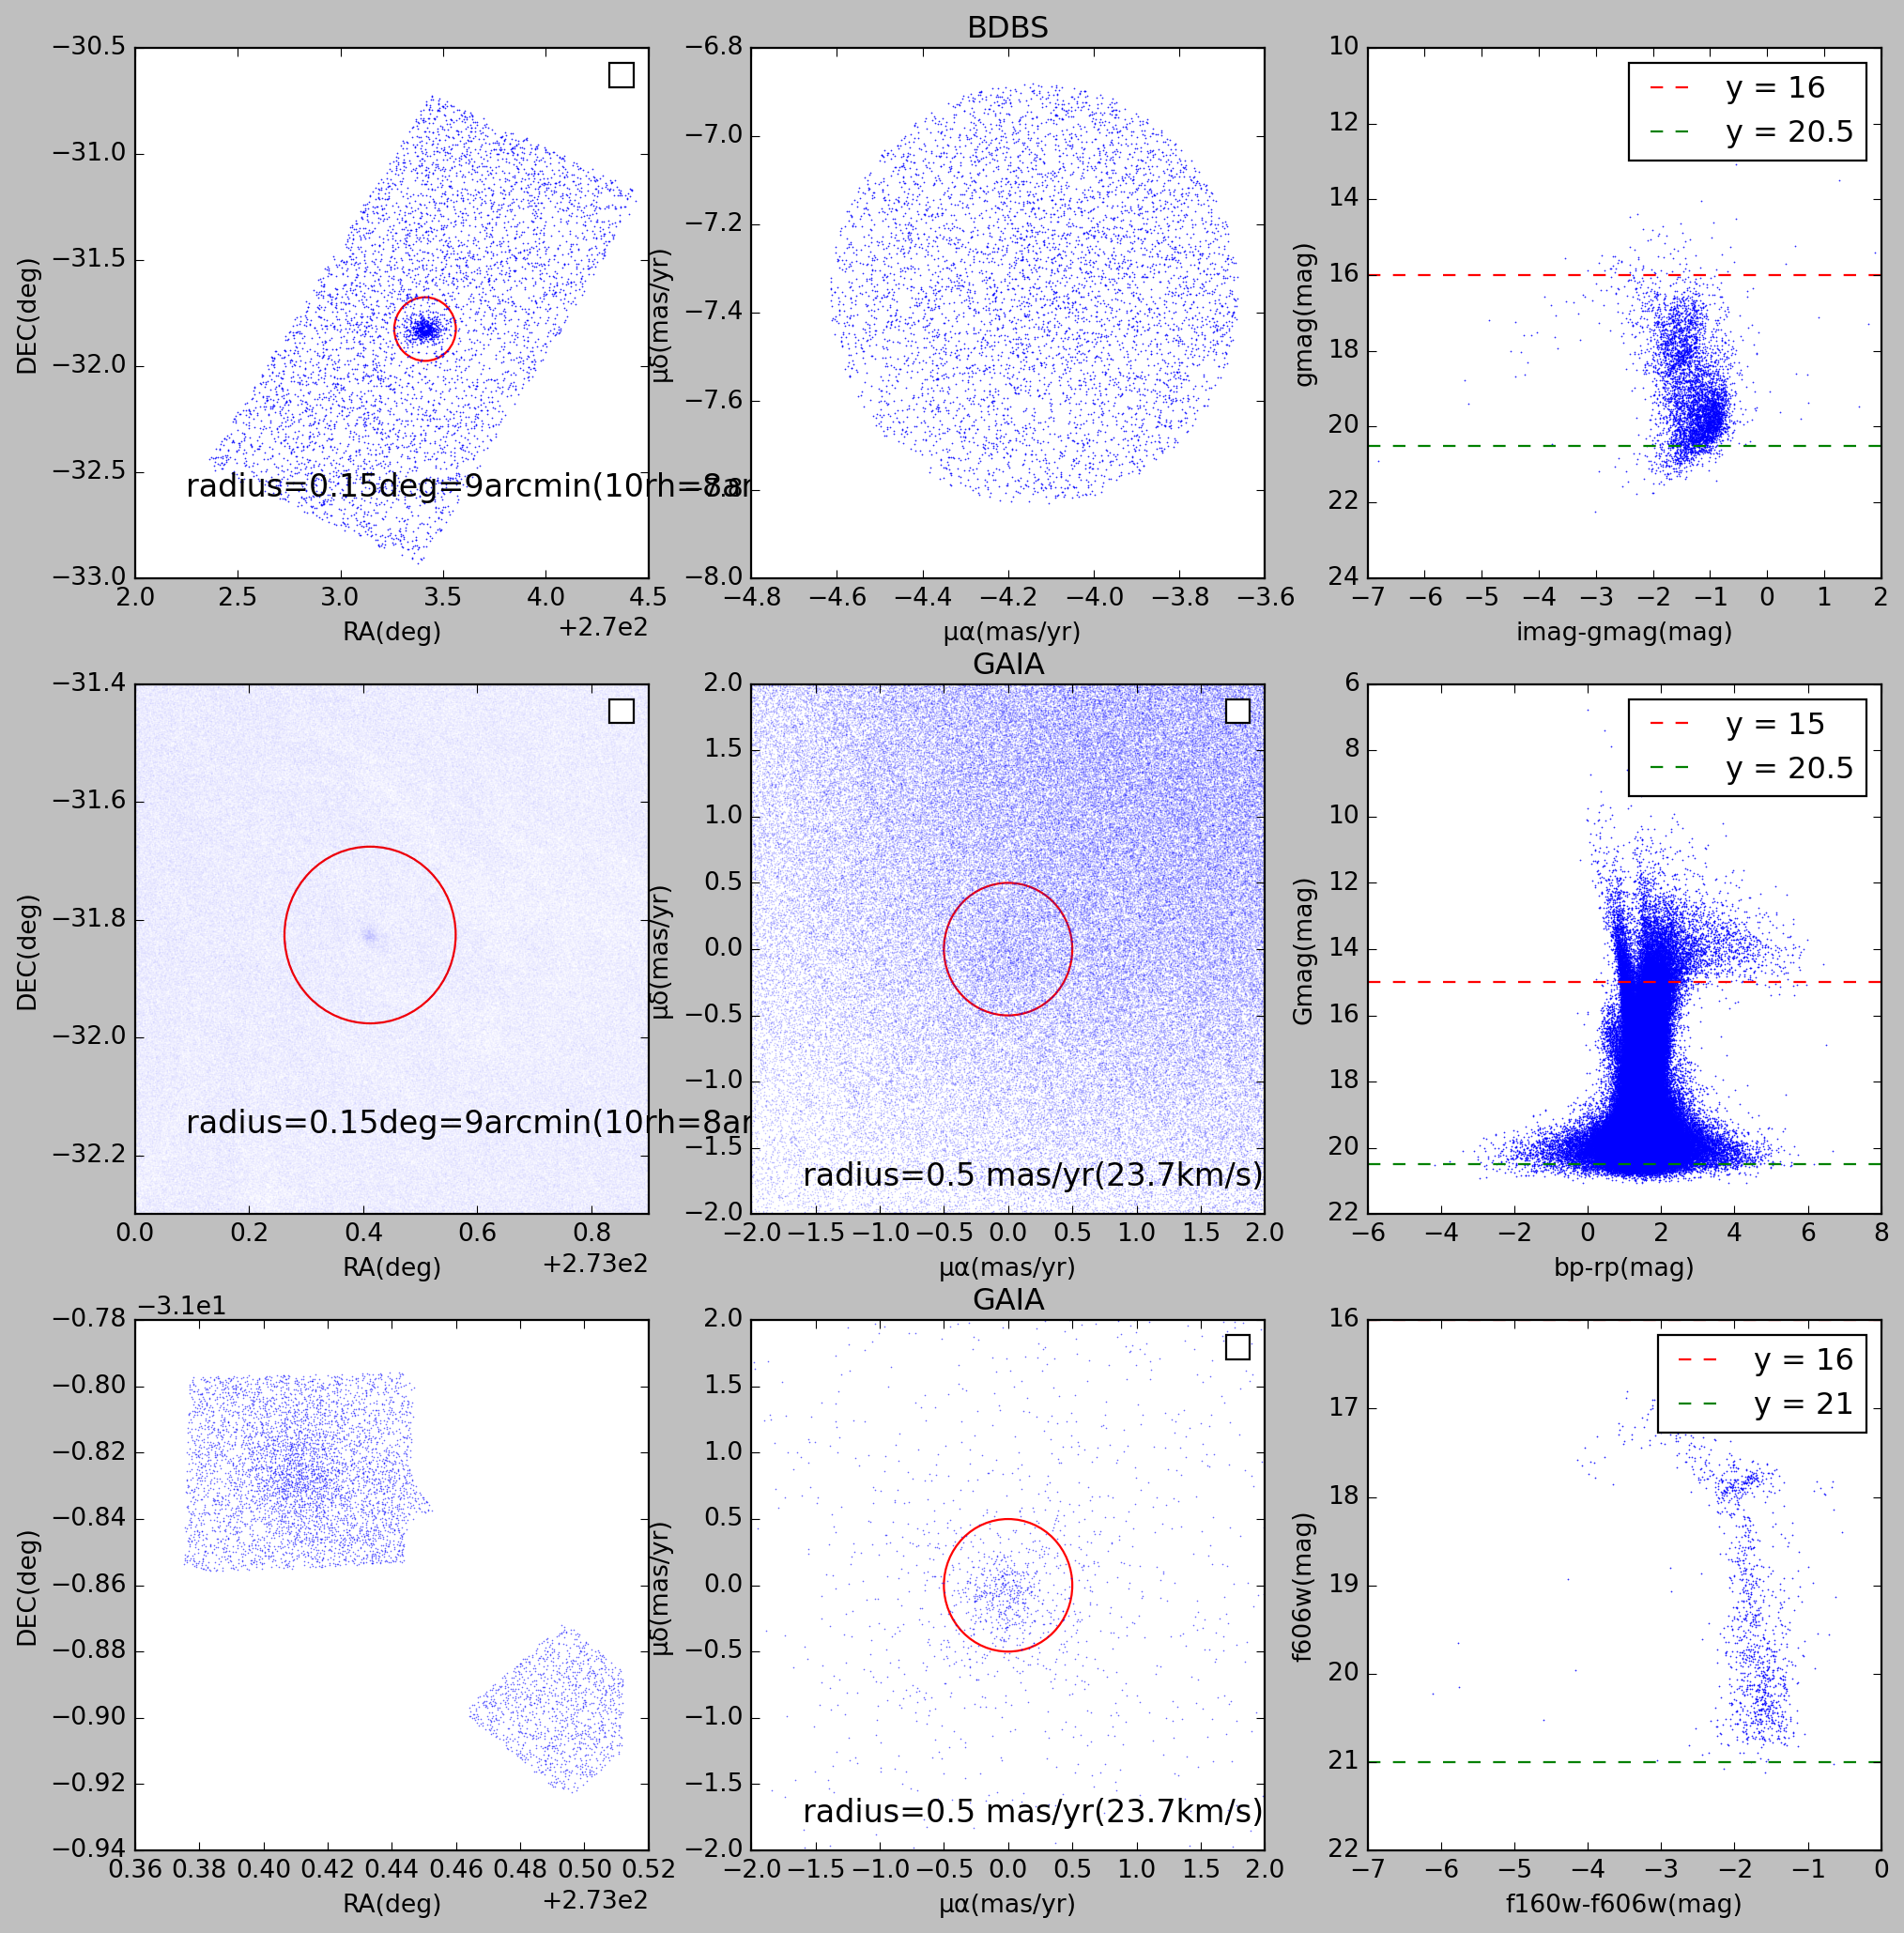

In [514]:

plt.figure(figsize=(15,15))

plt.subplot(331)
plt.plot(ra_bdbs,dec_bdbs,'.',ms=0.5)
circle_bdbs = plt.Circle((ra0,dec0), 0.15, fill=False, color='red', linewidth=1)
plt.gca().add_patch(circle_bdbs)
plt.text(0.1,0.2, 'radius=0.15deg=9arcmin(10rh=8arcmin)',fontsize=15,verticalalignment='top' ,transform = plt.gca().transAxes)
plt.legend()
plt.xlabel('RA(deg)')
plt.ylabel('DEC(deg)')

plt.subplot(332)
plt.title('BDBS')
plt.plot(pmra_bdbs,pmdec_bdbs,'.',ms=0.5)
plt.xlabel(' \u03BC\u03B1(mas/yr)')
plt.ylabel('\u03BC\u03B4(mas/yr)')

plt.subplot(333)
plt.plot(imag-gmag,gmag,'.',ms=0.5)
plt.xlabel('imag-gmag(mag)')
plt.ylabel('gmag(mag)')
ax = plt.gca()  
ax.invert_yaxis() 
plt.axhline(y=16, color='r', linestyle='--', label='y = 16')
plt.axhline(y=20.5, color='g', linestyle='--', label='y = 20.5')
plt.legend()

plt.subplot(334)
plt.plot(ra_gaia,dec_gaia,'.',ms=0.01)
circle_gaia = plt.Circle((ra0,dec0), 0.15, fill=False, color='red', linewidth=1)
plt.gca().add_patch(circle_gaia)
plt.text(0.1,0.2, 'radius=0.15deg=9arcmin(10rh=8arcmin)',fontsize=15,verticalalignment='top' ,transform = plt.gca().transAxes)
plt.legend()
plt.xlabel('RA(deg)')
plt.ylabel('DEC(deg)')
plt.xlim(273,273.9)
plt.ylim(-32.3,-31.4)

plt.subplot(335)
plt.title('GAIA')
radius = 0.5 #CHECK IN KM/S 23.7km/s
center_x = -4.109
center_y = -7.267
plt.plot(pmra_gaia-center_x, pmdec_gaia-center_y, '.',ms=0.1)
plt.xlabel('\u03BC\u03B1(mas/yr)')
plt.ylabel('\u03BC\u03B4(mas/yr)')
circle = plt.Circle((0,0), radius, fill=False, color='red')
plt.gca().add_patch(circle)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.text(0.1,0.1, 'radius=0.5 mas/yr(23.7km/s)',fontsize=15,verticalalignment='top' ,transform = plt.gca().transAxes)
plt.legend()

plt.subplot(336)
plt.plot(bprp_gaia,G_gaia,'.',ms=0.5)
plt.xlabel('bp-rp(mag)')
plt.ylabel('Gmag(mag)')
ax = plt.gca()  
ax.invert_yaxis() 
plt.axhline(y=15, color='r', linestyle='--', label='y = 15')
plt.axhline(y=20.5, color='g', linestyle='--', label='y = 20.5')
plt.legend()

plt.subplot(337)
plt.plot(ra_hst,dec_hst,'.',ms=0.3)
plt.xlabel('RA(deg)')
plt.ylabel('DEC(deg)')

plt.subplot(338)
plt.title('GAIA')
radius = 0.5 #CHECK IN KM/S 23.7km/s
center_x = -4.109
center_y = -7.267
plt.plot(pmra_hst-center_x, pmdec_hst-center_y, '.',ms=0.3)
plt.xlabel('\u03BC\u03B1(mas/yr)')
plt.ylabel('\u03BC\u03B4(mas/yr)')
circle = plt.Circle((0,0), radius, fill=False, color='red')
plt.gca().add_patch(circle)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.text(0.1,0.1, 'radius=0.5 mas/yr(23.7km/s)',fontsize=15,verticalalignment='top' ,transform = plt.gca().transAxes)
plt.legend()

plt.subplot(339)
plt.plot(f160w-f606w,f606w,'.',ms=0.5)
plt.xlabel('f160w-f606w(mag)')
plt.ylabel('f606w(mag)')
plt.axhline(y=16, color='r', linestyle='--', label='y = 16')
plt.axhline(y=21, color='g', linestyle='--', label='y = 21')
plt.legend()
ax = plt.gca()  
ax.invert_yaxis() 

plt.show()

In [20]:
plt.plot(ra_hst,dec_hst,'.',ms=0.007,label='HST',c='yellow')
plt.plot(ra_bdbs,dec_bdbs,'.',ms=0.5,label='BDBS',c='b')
plt.plot(ra_gaia,dec_gaia,'.',ms=0.01,label='GAIA',c='peru')

circle_bdbs = plt.Circle((ra0,dec0), 0.55, fill=False, color='red', linewidth=4)
plt.gca().add_patch(circle_bdbs)

circle_gaia = plt.Circle((ra0,dec0), 0.55, fill=False, color='yellow', linewidth=1)
plt.gca().add_patch(circle_gaia)

circle_hst = plt.Circle((ra0,dec0), 0.028, fill=False, color='cyan', linewidth=2)
plt.gca().add_patch(circle_hst)

plt.legend()
plt.xlim(272.86,273.96)
plt.ylim(-32.38,-31.28)
plt.xlabel('ra(deg)')
plt.ylabel('dec(deg)')
plt.title('NGC6569')

Text(0.5, 1.0, 'NGC6569')

In [21]:
plt.plot(ra_hst,dec_hst,'.',ms=0.1,label='HST',c='yellow')
circle_hst = plt.Circle((ra0,dec0), 0.028, fill=False, color='cyan', linewidth=2)
plt.gca().add_patch(circle_hst)

In [22]:
x0 = [5,0.03] # Starting values   PARAM:W0,rh
par_gaia = fmin(minloglike, x0, args=(r_stars_gaia,)) #start the emcee from the best fit parults 
print(" \n parult: W0_gaia = %5.3f (True=%5.3f)"%(par_gaia[0], W0),"; rh_gaia = %5.3f (True=%5.3f)"%(par_gaia[1], rh))

par_bdbs = fmin(minloglike, x0, args=(r_stars_bdbs,)) 
print(" \n parult: W0_bdbs = %5.3f (True=%5.3f)"%(par_bdbs[0], W0),"; rh_bdbs = %5.3f (True=%5.3f)"%(par_bdbs[1], rh))

par_hst = fmin(minloglike, x0, args=(r_stars_hst,)) 
print(" \n parult: W0_hst = %5.3f (True=%5.3f)"%(par_hst[0], W0),"; rh_hst = %5.3f (True=%5.3f)"%(par_hst[1], rh))

Optimization terminated successfully.
         Current function value: 19645.656013
         Iterations: 13
         Function evaluations: 51
 
 parult: W0_gaia = 5.000 (True=5.253) ; rh_gaia = 0.030 (True=0.080)
Optimization terminated successfully.
         Current function value: 11459.966008
         Iterations: 13
         Function evaluations: 51
 
 parult: W0_bdbs = 5.000 (True=5.253) ; rh_bdbs = 0.030 (True=0.080)
Optimization terminated successfully.
         Current function value: 1500.008527
         Iterations: 62
         Function evaluations: 116
 
 parult: W0_hst = 12.789 (True=5.253) ; rh_hst = 1.076 (True=0.080)


In [23]:
x0 = [5,12,13,0.03,1.2,3.4] # Starting values   PARAM:W0,rh
par_all = fmin(minloglike_allsurveys, x0, args=(r_stars_bdbs,r_stars_hst,r_stars_gaia,)) #start the emcee from the best fit parults 
print(" \n parult: W0 = %5.3f (True=%5.3f)"%(par_all[0], W0),"; rh = %5.3f (True=%5.3f)"%(par_all[1], rh))

KeyboardInterrupt: 

In [24]:
#######################      gaia data  ##############
annulii_gaia = np.histogram(r_stars_gaia, bins=30)
surf_dens_gaia, numb_error_gaia, r_cent_annulii_gaia = Surface_density(annulii_gaia)
plt.errorbar(r_cent_annulii_gaia,surf_dens_gaia, numb_error_gaia,capsize=3,label='gaia data') 

#####################           bdbs data ##################
#plt.text(0.7,0.9,fontsize=12,verticalalignment='top' ,transform = plt.gca().transAxes)
annulii_bdbs = np.histogram(r_stars_bdbs, bins=30)
surf_dens_bdbs, numb_error_bdbs, r_cent_annulii_bdbs = Surface_density(annulii_bdbs)
plt.errorbar(r_cent_annulii_bdbs,surf_dens_bdbs, numb_error_bdbs,capsize=3,label='bdbs data')

#######################             hst data   ############
annulii_hst = np.histogram(r_stars_hst, bins=15)
surf_dens_hst, numb_error_hst, r_cent_annulii_hst = Surface_density(annulii_hst)
plt.errorbar(r_cent_annulii_hst,surf_dens_hst, numb_error_hst,capsize=3,label='hst data')

plt.legend()
plt.xlabel('Radius (arcmin)')
plt.ylabel(r'Surface Density (arcsec$^{-2})$')
plt.title('Surface Density of NGC 6569')
plt.yscale('log')  
plt.xscale('log')  
plt.grid()
plt.show()

ValueError: math domain error

<Figure size 640x480 with 1 Axes>

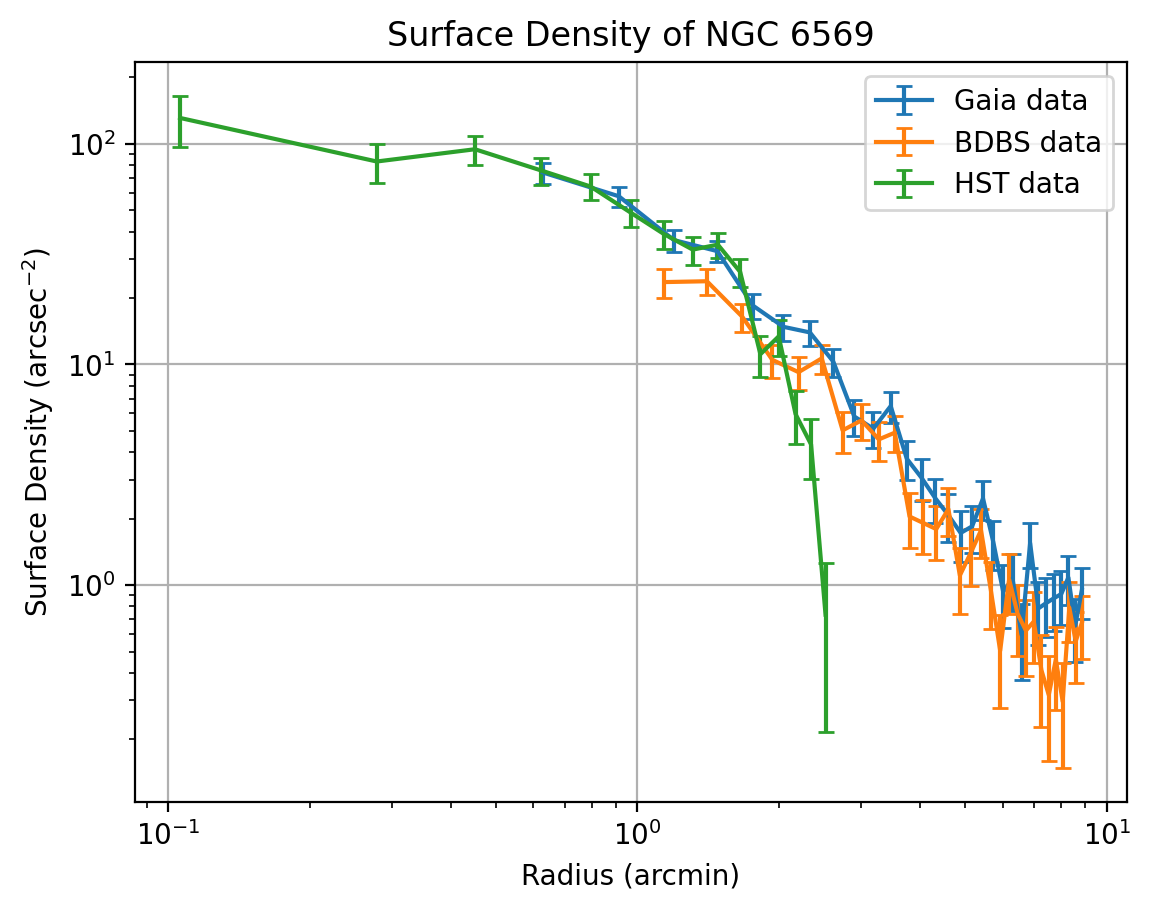

In [45]:
import numpy as np
import matplotlib.pyplot as plt
def Surface_density(annulii):
    counts, bins = annulii
    r_cent = (bins[1:] + bins[:-1]) / 2
    area_annulus = np.pi * (bins[1:]**2 - bins[:-1]**2)
    surf_dens = counts / area_annulus
    numb_error = np.sqrt(counts) / area_annulus
    return surf_dens, numb_error, r_cent

# Gaia 
annulii_gaia = np.histogram(r_stars_gaia, bins=30)
surf_dens_gaia, numb_error_gaia, r_cent_annulii_gaia = Surface_density(annulii_gaia)

# BDBS 
annulii_bdbs = np.histogram(r_stars_bdbs, bins=30)
surf_dens_bdbs, numb_error_bdbs, r_cent_annulii_bdbs = Surface_density(annulii_bdbs)

# HST 
annulii_hst = np.histogram(r_stars_hst, bins=15)
surf_dens_hst, numb_error_hst, r_cent_annulii_hst = Surface_density(annulii_hst)

plt.errorbar(r_cent_annulii_gaia, surf_dens_gaia, numb_error_gaia, capsize=3, label='Gaia data')
plt.errorbar(r_cent_annulii_bdbs, surf_dens_bdbs, numb_error_bdbs, capsize=3, label='BDBS data')
plt.errorbar(r_cent_annulii_hst, surf_dens_hst, numb_error_hst, capsize=3, label='HST data')


r_bg = 4.0  # background

#  Gaia 
bg_gaia = np.mean(surf_dens_gaia[r_cent_annulii_gaia > r_bg])
surf_dens_gaia_corrected = surf_dens_gaia - bg_gaia

#  BDBS 
bg_bdbs = np.mean(surf_dens_bdbs[r_cent_annulii_bdbs > r_bg])
surf_dens_bdbs_corrected = surf_dens_bdbs - bg_bdbs




plt.legend()
plt.xlabel('Radius (arcmin)')
plt.ylabel(r'Surface Density (arcsec$^{-2}$)')
plt.title('Surface Density of NGC 6569')
plt.yscale('log') 
plt.xscale('log')  
plt.grid()
plt.show()


In [ ]:
print(r_stars_gaia.shape)
print(r_stars_hst.shape)
print(r_stars_bdbs.shape)

(948,)
(527,)
(553,)


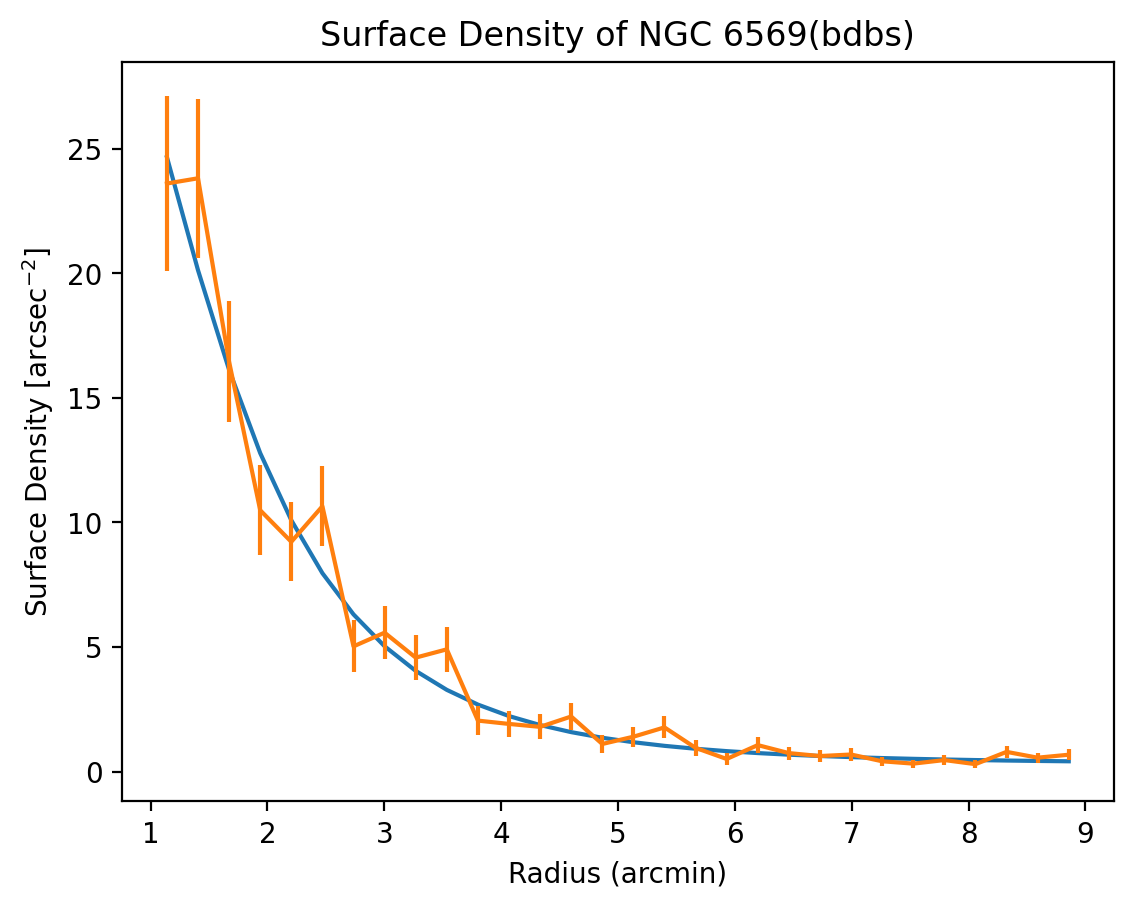

Results for bdbs:
The 'core radius' of the cluster in arcmin is 1.4
log_Likelihood: -19.2
n_0_bdbs: 38.7
alpha: 2.3
gamma: 4.3
Background: 0.3

Results for hst:
The 'core radius' of the cluster in arcmin is -1.3
log_Likelihood: -10000000000000000159028911097599180468360808563945281389781327557747838772170381060813469985856815104.0
n_0_hst: 142.8
alpha: -0.9
gamma: 1.2
Background: -38.1

Results for gaia:
The 'core radius' of the cluster in arcmin is 1.0
log_Likelihood: -20.7
n_0_gaia: 96.9
alpha: 1.4
gamma: 3.3
Background: 0.5


C:\Users\14246\AppData\Local\Temp\ipykernel_19620\949168786.py:54: RuntimeWarning: divide by zero encountered in divide
  chi_square = np.sum(((model - surf_dens) ** 2) / (numb_error ** 2))
C:\Users\14246\AppData\Local\Temp\ipykernel_19620\478083141.py:28: RuntimeWarning: divide by zero encountered in log10
  log_like_hst = np.log10(like_hst)


Optimization terminated successfully.
         Current function value: 11459.966008
         Iterations: 13
         Function evaluations: 51
 
 parult: W0_gaia = 6.000 (True=6.000) ; rh_gaia = 0.080 (True=0.080)

 Model properties: 
 ----------------- 
 phi0 =  6.00; g = 1.00
 Converged = True
 M =  1.691e+01; U = -3.108e+01; K = 1.554e+01; Q = 0.5000;  2Kr/Kt = 1.000
 rv/rh = 1.244; rh/r0 =  2.647; rt/r0 =  17.992; ra/rh = 37780534.779
r0: 1.00
rh: 2.65
rt: 17.99
ra: 100000000.00


In [58]:
model_bdbs, param_bdbs = King_model_fit(r_cent_annulii_bdbs, surf_dens_bdbs, [3,8,1,0.2], numb_error_bdbs)
model_hst, param_hst = King_model_fit(r_cent_annulii_hst, surf_dens_hst, [3,8,1,0.2], numb_error_hst)
model_gaia, param_gaia = King_model_fit(r_cent_annulii_gaia, surf_dens_gaia, [3,8,1,0.2], numb_error_gaia)

fig = plt.figure()
plt.plot(r_cent_annulii_bdbs,model_bdbs)
plt.errorbar(r_cent_annulii_bdbs,surf_dens_bdbs, numb_error_bdbs)
plt.xlabel('Radius (arcmin)')
plt.ylabel(r'Surface Density [arcsec$^{-2}]$')
plt.title('Surface Density of NGC 6569(bdbs)')
plt.show()


r_c_bdbs = param_bdbs[1] * np.sqrt((2 ** (2 / param_bdbs[2]) - 1))
like_bdbs = likelihood(*param_bdbs, r_stars_bdbs)
log_likelihood_bdbs = log_likelihood_fn(param_bdbs,r_stars_bdbs)
log_like_bdbs = np.log10(like_bdbs)
print("Results for bdbs:")
print("The 'core radius' of the cluster in arcmin is {:.1f}".format(r_c_bdbs))
print('log_Likelihood: {:.1f}'.format(log_likelihood_bdbs))
print('n_0_bdbs: {:.1f}'.format(param_bdbs[0]))
print('alpha: {:.1f}'.format(param_bdbs[1]))
print('gamma: {:.1f}'.format(param_bdbs[2]))
print('Background: {:.1f}'.format(param_bdbs[3]))

r_c_hst = param_hst[1] * np.sqrt((2 ** (2 / param_hst[2]) - 1))
like_hst = likelihood(*param_hst, r_stars_hst)
log_like_hst = np.log10(like_hst)
log_likelihood_hst = log_likelihood_fn(param_hst,r_stars_hst)
print("\nResults for hst:")
print("The 'core radius' of the cluster in arcmin is {:.1f}".format(r_c_hst))
print('log_Likelihood: {:.1f}'.format(log_likelihood_hst))
print('n_0_hst: {:.1f}'.format(param_hst[0]))
print('alpha: {:.1f}'.format(param_hst[1]))
print('gamma: {:.1f}'.format(param_hst[2]))
print('Background: {:.1f}'.format(param_hst[3]))

r_c_gaia = param_gaia[1] * np.sqrt((2 ** (2 / param_gaia[2]) - 1))
like_gaia = likelihood(*param_gaia, r_stars_gaia)
log_like_gaia = np.log10(like_gaia)
log_likelihood_gaia = log_likelihood_fn(param_gaia,r_stars_gaia)
print("\nResults for gaia:")
print("The 'core radius' of the cluster in arcmin is {:.1f}".format(r_c_gaia))
print('log_Likelihood: {:.1f}'.format(log_likelihood_gaia))
print('n_0_gaia: {:.1f}'.format(param_gaia[0]))
print('alpha: {:.1f}'.format(param_gaia[1]))
print('gamma: {:.1f}'.format(param_gaia[2]))
print('Background: {:.1f}'.format(param_gaia[3]))

x0 = [6,0.08] # Starting values   PARAM:W0,rh
par = fmin(minloglike, x0, args=(r_stars_bdbs,)) #start the emcee from the best fit parults 
print(" \n parult: W0_gaia = %5.3f (True=%5.3f)"%(par[0], W0),"; rh_gaia = %5.3f (True=%5.3f)"%(par[1], rh))
#W0 = par[0]
#rh = par[1]
W0, g = 6,1 #king model:g=1
k = limepy(W0, g, verbose=True)
print('r0: {:.2f}'.format(k.r0))
print('rh: {:.2f}'.format(k.rh))
print('rt: {:.2f}'.format(k.rt))
print('ra: {:.2f}'.format(k.ra))

In [69]:
model_hst, param_hst, err = King_model_fit(r_cent_annulii_hst, surf_dens_hst, [3,8,1,0.2], numb_error_hst)


In [70]:
err

array([62.015423  ,  0.69755989,  1.52917977, 50.52943157])

In [71]:
param_hst

array([142.80712827,  -0.89582308,   1.19256445, -38.06830138])

In [54]:
log_likelihood_bdbs

-19.174572934768104

In [60]:
1/10000*60*15.72


0.09432

log_Likelihood: -10000000000000000159028911097599180468360808563945281389781327557747838772170381060813469985856815104.0


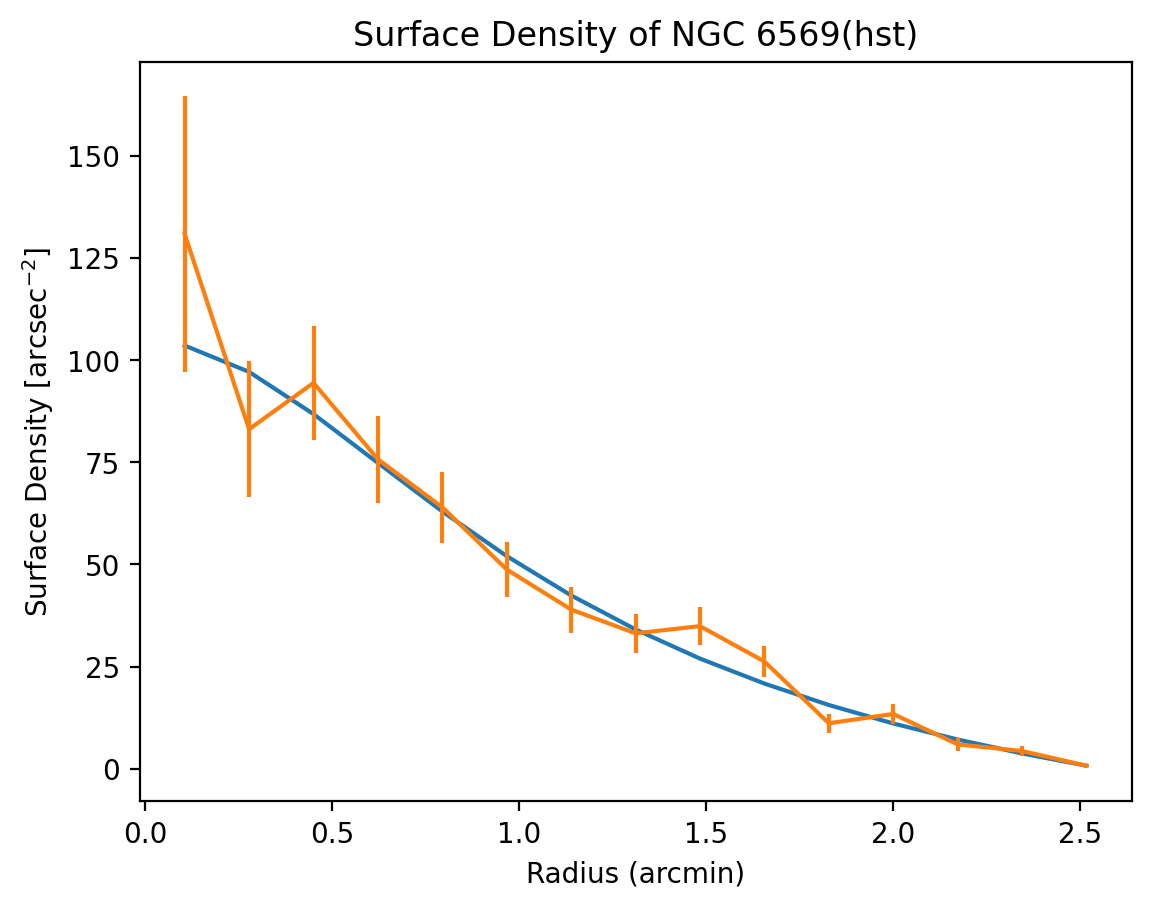

In [65]:
fig = plt.figure()
plt.plot(r_cent_annulii_hst,model_hst)
plt.errorbar(r_cent_annulii_hst,surf_dens_hst, numb_error_hst)
log_likelihood_hst = log_likelihood_fn(param_hst,r_stars_hst)
plt.xlabel('Radius (arcmin)')
plt.ylabel(r'Surface Density [arcsec$^{-2}]$')
plt.title('Surface Density of NGC 6569(hst)')
print('log_Likelihood: {:.1f}'.format(log_likelihood_hst))
plt.show()

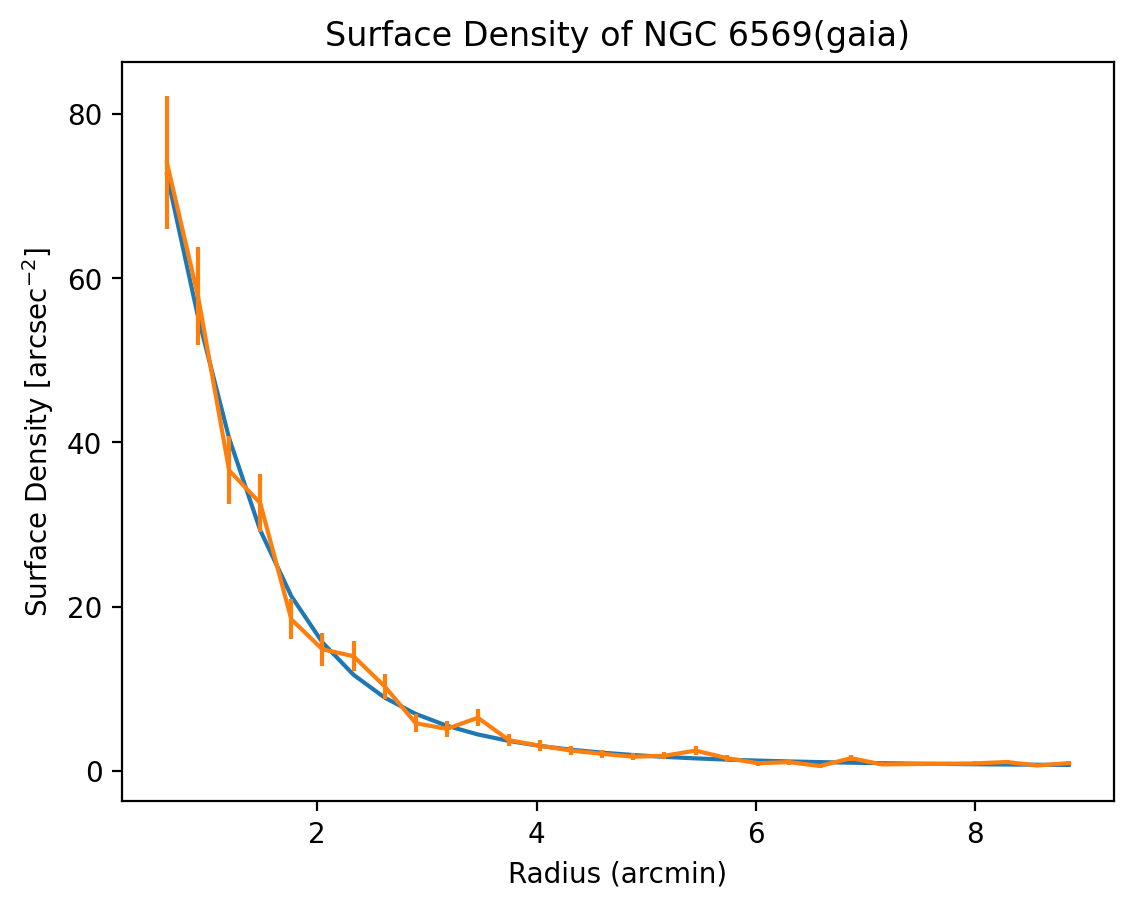

The 'core radius' of the cluster in arcmin is 1.03
likelihood: 0.00
n_0: 96.88
alpha: 1.42
gamma: 3.31
Optimization terminated successfully.
         Current function value: 4414.818179
         Iterations: 53
         Function evaluations: 102
 
 parult: W0_gaia = 5.229 (True=5.000) ; rh_gaia = 3.120 (True=0.080)

 Model properties: 
 ----------------- 
 phi0 =  5.23; g = 1.00
 Converged = True
 M =  1.283e+01; U = -2.255e+01; K = 1.128e+01; Q = 0.5000;  2Kr/Kt = 1.000
 rv/rh = 1.233; rh/r0 =  2.118; rt/r0 =  11.946; ra/rh = 47213176.616
r0: 1.00
rh: 2.12
rt: 11.95
ra: 100000000.00


In [46]:
model_gaia, param_gaia = King_model_fit(r_cent_annulii_gaia, surf_dens_gaia, [3,8,1,0.3], numb_error_gaia)
fig = plt.figure()
plt.plot(r_cent_annulii_gaia,model_gaia)
plt.errorbar(r_cent_annulii_gaia,surf_dens_gaia, numb_error_gaia)
plt.xlabel('Radius (arcmin)')
plt.ylabel(r'Surface Density [arcsec$^{-2}]$')
plt.title('Surface Density of NGC 6569(gaia)')
plt.show()
r_c_gaia = param_gaia[1] * np.sqrt((2 ** (2 / param_gaia[2]) - 1))
print("The 'core radius' of the cluster in arcmin is {:.2f}".format(r_c_gaia))
like_gaia = likelihood(*param_gaia, r_stars_gaia)
log_like_gaia = np.log10(like_gaia)
print('likelihood: {:.2f}'.format(like_gaia))
print('n_0: {:.2f}'.format(param_gaia[0]))
print('alpha: {:.2f}'.format(param_gaia[1]))
print('gamma: {:.2f}'.format(param_gaia[2]))

W0, rh = 5, 0.08      #数据的真实值
k = limepy(W0, 1, M=1e5, rh=rh)
from scipy.optimize import fmin

x0 = [6,0.08] # Starting values   PARAM:W0,rh
par = fmin(minloglike, x0, args=(r_stars_gaia,)) #start the emcee from the best fit parults 
print(" \n parult: W0_gaia = %5.3f (True=%5.3f)"%(par[0], W0),"; rh_gaia = %5.3f (True=%5.3f)"%(par[1], rh))
#W0 = par[0]
#rh = par[1]
W0, g = 5.229,1 #king model:g=1
k = limepy(W0, g, verbose=True)
print('r0: {:.2f}'.format(k.r0))
print('rh: {:.2f}'.format(k.rh))
print('rt: {:.2f}'.format(k.rt))
print('ra: {:.2f}'.format(k.ra))

In [28]:
#hst new data
#model_hst2, param_hst2 = King_model_fit(r_cent_annulii_hst2, surf_dens_hst2, [3,8,1], error_hst2)
surf_dens_hst3, numb_error_hst3, r_cent_annulii_hst3 = Surface_density(n_star_annulii)
model_hst3, param_hst3 = King_model_fit(r_cent_annulii_hst3, surf_dens_hst3, [3,8,1], numb_error_hst3)
plt.errorbar(r_cent_annulii_hst3,surf_dens_hst3, numb_error_hst3,capsize=3,label='hst data2',c='black')
plt.plot(r_cent_annulii_hst2,model_hst3,c='red')
plt.legend()
plt.xlabel('Radius (arcmin)')
plt.ylabel(r'Surface Density (arcsec$^{-2})$')
plt.title('Surface Density of NGC 6569(HST)')
plt.grid()
plt.show()


print('n_0: {:.2f}'.format(param_hst3[0]))
print('alpha: {:.2f}'.format(param_hst3[1]))
print('gamma: {:.2f}'.format(param_hst3[2]))

ValueError: too many values to unpack (expected 2)

ValueError: x, y, and format string must not be None

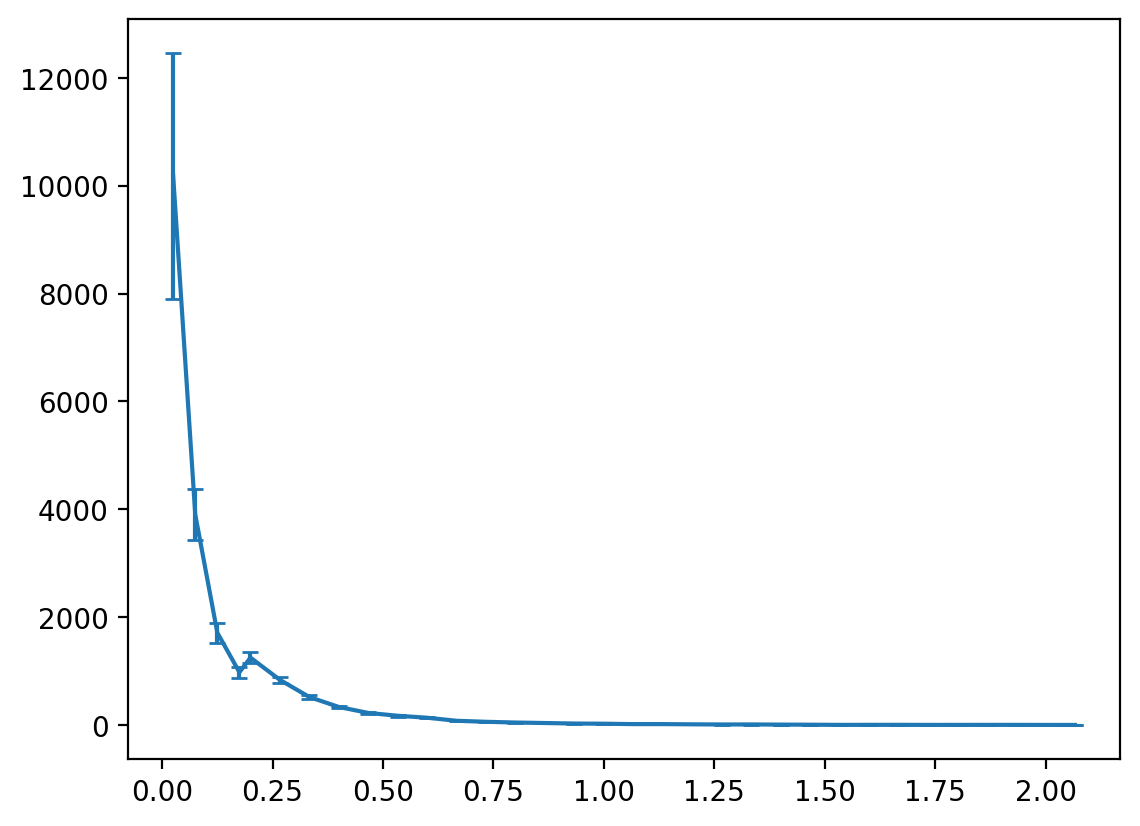

In [ ]:
# 中心半径转换为角分后的面积计算
r_out = r_cent_annulii_hst2  # 假设外半径就是每个annuli的中心半径
r_in = np.zeros_like(r_out)  # 假设内半径为0，或者根据实际情况进行调整
area = np.pi * (r_out**2 - r_in**2)  # 计算每个annuli的面积

surf_dens_hst2 = n_star_annulii / area
numb_error_hst2 = np.sqrt(n_star_annulii) / area
model_hst2, param_hst2 = King_model_fit(r_cent_annulii_hst2, surf_dens_hst2, [3,8,1,0.1], numb_error_hst2)
plt.errorbar(r_cent_annulii_hst2,surf_dens_hst2, numb_error_hst2,capsize=3,label='hst data2')
plt.plot(r_cent_annulii_hst2,model_hst2)
plt.legend()
plt.xlabel('Radius (arcmin)')
plt.ylabel(r'Surface Density (arcsec$^{-2})$')
plt.title('Surface Density of NGC 6569(HST2)')
plt.grid()
plt.yscale('log')  
plt.xscale('log') 
plt.show()
r_c_gaia = param_hst2[1] * np.sqrt((2 ** (2 / param_hst2[2]) - 1))
print('n_0: {:.2f}'.format(param_hst2[0]))
print('alpha: {:.2f}'.format(param_hst2[1]))
print('gamma: {:.2f}'.format(param_hst2[2]))
print('r_C: {:.2f}'.format(r_c_gaia))

In [ ]:
x0 = [25,12062,105,13,23,30,5,3] # Starting values   PARAM: n_0_bdbs, n_0_hst, n_0_gaia, b_bdbs, b_hst, b_gaia, alpha, gamma
par_all = fmin(log_likelihood_fn_allsurveys, x0, args=(r_stars_bdbs,r_stars_hst,r_stars_gaia,)) #start the emcee from the best fit parults 
print('n_0_bdbs =', par_all[0])
print('n_0_hst =', par_all[1])
print('n_0_gaia =', par_all[2])
print('b_0_bdbs =', par_all[3])
print('b_0_hst =', par_all[4])
print('b_0_gaia =', par_all[5])
print('alpha =', par_all[6])
print('gamma =', par_all[7])

C:\Users\14246\AppData\Local\Temp\ipykernel_18436\3380809127.py:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  par_all = fmin(log_likelihood_fn_allsurveys, x0, args=(r_stars_bdbs,r_stars_hst,r_stars_gaia,)) #start the emcee from the best fit parults

n_0_bdbs = 5.7565692758994835e+51
n_0_hst = 7.213864432270386e+54
n_0_gaia = -4.581465612189433e+52
b_0_bdbs = 3.1103676699487306e+51
b_0_hst = 3.862114402564908e+51
b_0_gaia = -2.9378109247957405e+52
alpha = 1.2129287034491569e+51
gamma = -5.737418490007564e+49


In [29]:
#fit only gaia and hst
def log_likelihood_fn_2surveys(params, r_stars_arc_bdbs,r_stars_arc_gaia ):
    n_0_bdbs, n_0_gaia, b_bdbs, b_gaia, alpha, gamma = params

    if (n_0_bdbs < 0) | (n_0_bdbs> 1000) : #check the limits
        return -10**100
    if (rh < 0) : #check the limits
        return -10**100
    
    #do this 3 times for 3 surveys 
    annulii_bdbs = np.histogram(r_stars_arc_bdbs, bins=40)
    annulii_gaia = np.histogram(r_stars_arc_gaia,bins=40)
 
    surf_dens_bdbs, numb_error_bdbs, radii_bdbs = Surface_density(annulii_bdbs)
    surf_dens_gaia, numb_error_gaia, radii_gaia = Surface_density(annulii_gaia)

    model_bdbs = King_model(radii_bdbs, n_0_bdbs, alpha, gamma) + b_bdbs
    model_gaia = King_model(radii_gaia, n_0_gaia, alpha, gamma) + b_gaia

    #make a big array
    model = np.hstack((model_bdbs, model_gaia)) #one long array, try concatenate 
    surf_dens = np.concatenate((surf_dens_bdbs, surf_dens_gaia,))
    numb_error = np.hstack((numb_error_bdbs,numb_error_gaia ))

    #add constraints on the parameters as in the limepy function
    #add 3 bgk varabiales
    chi_square = np.sum(((model - surf_dens) ** 2) / (numb_error ** 2))
    log_likelihood = -0.5 * chi_square
    return log_likelihood

def minloglike_2surveys(par, r_stars_arc_bdbs,r_stars_arc_gaia):
    W0_bdbs,W0_gaia, rh_bdbs, rh_gaia = par
     
    m_bdbs = limepy(W0_bdbs, 1, M=1, rh=rh_bdbs, project=True)
    m_gaia = limepy(W0_gaia, 1, M=1, rh=rh_gaia, project=True)
    
    log_likelihood_bdbs = -np.sum(np.log(np.interp(r_stars_arc_bdbs, m_bdbs.R, m_bdbs.Sigma, right=1e-9)))
    log_likelihood_gaia = -np.sum(np.log(np.interp(r_stars_arc_gaia, m_gaia.R, m_gaia.Sigma, right=1e-9)))
    
    total_log_likelihood = log_likelihood_gaia + log_likelihood_bdbs
    return total_log_likelihood

x0 = [25,105,13,30,5,3] # Starting values   PARAM: n_0_bdbs, n_0_hst, n_0_gaia, b_bdbs, b_hst, b_gaia, alpha, gamma
par_all = fmin(log_likelihood_fn_2surveys, x0, args=(r_stars_bdbs,r_stars_gaia,)) #start the emcee from the best fit parults 
n_0_bdbs = par_all[1]
n_0_gaia = par_all[2]
b_0_bdbs = par_all[3]
b_0_gaia = par_all[4]
alpha = par_all[4]
gamma = par_all[5]
print('n_0_bdbs:{:.4f}'.format(par_all[0]))
print('n_0_gaia:{:.4f}'.format(par_all[1]))
print('b_0_bdbs:{:.4f}'.format(par_all[2]))
print('b_0_gaia:{:.4f}'.format(par_all[3]))
print('alpha:{:.4f}'.format(par_all[4]))
print('gamma:{:.4f}'.format(par_all[5]))

TypeError: King_model() missing 1 required positional argument: 'b'

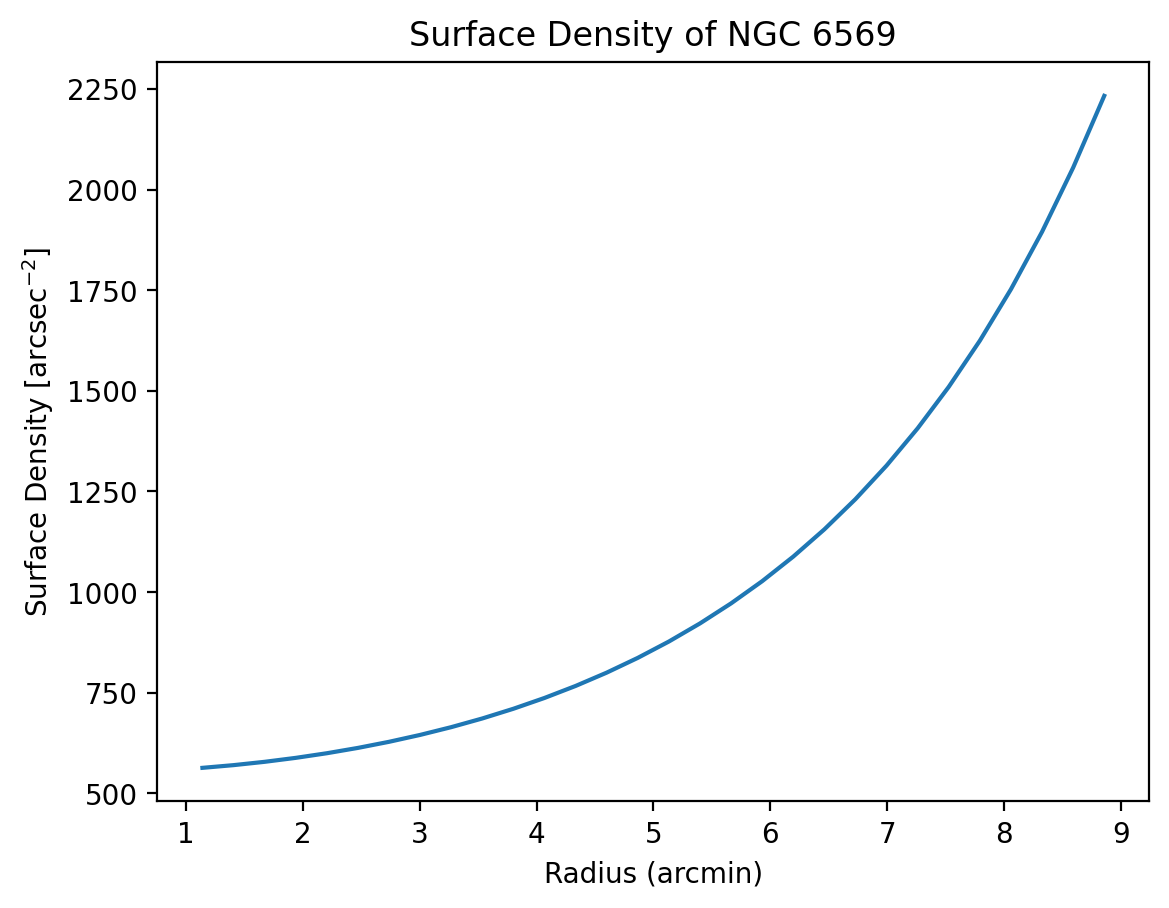

In [89]:
model_bdbs_2 = n_0_bdbs*(1+(r_cent_annulii_bdbs/alpha)**2)**(-gamma/2) + b_0_bdbs
model_gaia_2 = n_0_gaia*(1+(r_cent_annulii_gaia/alpha)**2)**(-gamma/2) + b_0_gaia
fig = plt.figure()
plt.plot(r_cent_annulii_bdbs,model_bdbs_2)
#plt.errorbar(r_cent_annulii_bdbs,surf_dens_bdbs, numb_error_bdbs)
plt.xlabel('Radius (arcmin)')
plt.ylabel(r'Surface Density [arcsec$^{-2}]$')


#plt.plot(r_cent_annulii_gaia,model_gaia_2)
#plt.errorbar(r_cent_annulii_gaia,surf_dens_gaia, numb_error_gaia)
plt.xlabel('Radius (arcmin)')
plt.ylabel(r'Surface Density [arcsec$^{-2}]$')
plt.title('Surface Density of NGC 6569')
plt.show()

In [44]:
import emcee
# 初始化步长
nwalkers = 100
ndim = 4   # 参数维度为3

initial_pos = [param_gaia + 1e-4 * np.random.randn(ndim) for _ in range(nwalkers)]

n_0 = np.random.uniform(low=80, high=110, size=nwalkers)
alpha = np.random.normal(loc=param_gaia[1], scale=0.1, size=nwalkers)
gamma = np.random.uniform(low=1, high=10, size=nwalkers)
b = np.random.uniform(low=0, high=5, size=nwalkers)

pos = np.vstack((n_0, alpha, gamma,b)).T   # 需要转置以匹配 (nwalkers, ndim) 的形状
nwalkers, ndim = pos.shape
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood_fn, args=(r_stars_gaia,))
sampler.run_mcmc(pos, 5000, progress=True)
samples = sampler.get_chain()
print('样本链：', samples)

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [01:34<00:00, 53.07it/s]

样本链： [[[9.76884304e+01 1.23615263e+00 2.88256746e+00 5.96360410e-02]
  [9.05728693e+01 1.43859441e+00 3.99217714e+00 3.44207791e+00]
  [8.88633524e+01 1.28438682e+00 1.89324605e+00 1.25603922e+00]
  ...
  [1.07098612e+02 1.43577183e+00 8.77878694e+00 3.84274754e+00]
  [8.17673898e+01 1.36762193e+00 6.49000162e+00 1.59497849e+00]
  [1.06924739e+02 1.37347545e+00 7.41757779e+00 2.74694217e+00]]

 [[9.76884304e+01 1.23615263e+00 2.88256746e+00 5.96360410e-02]
  [9.37872582e+01 1.46566006e+00 5.77788589e+00 3.47583959e+00]
  [8.88633524e+01 1.28438682e+00 1.89324605e+00 1.25603922e+00]
  ...
  [1.07098612e+02 1.43577183e+00 8.77878694e+00 3.84274754e+00]
  [8.17673898e+01 1.36762193e+00 6.49000162e+00 1.59497849e+00]
  [1.09080676e+02 1.35410907e+00 7.30841953e+00 2.52257430e+00]]

 [[9.76884304e+01 1.23615263e+00 2.88256746e+00 5.96360410e-02]
  [9.37872582e+01 1.46566006e+00 5.77788589e+00 3.47583959e+00]
  [8.88633524e+01 1.28438682e+00 1.89324605e+00 1.25603922e+00]
  ...
  [1.07098612

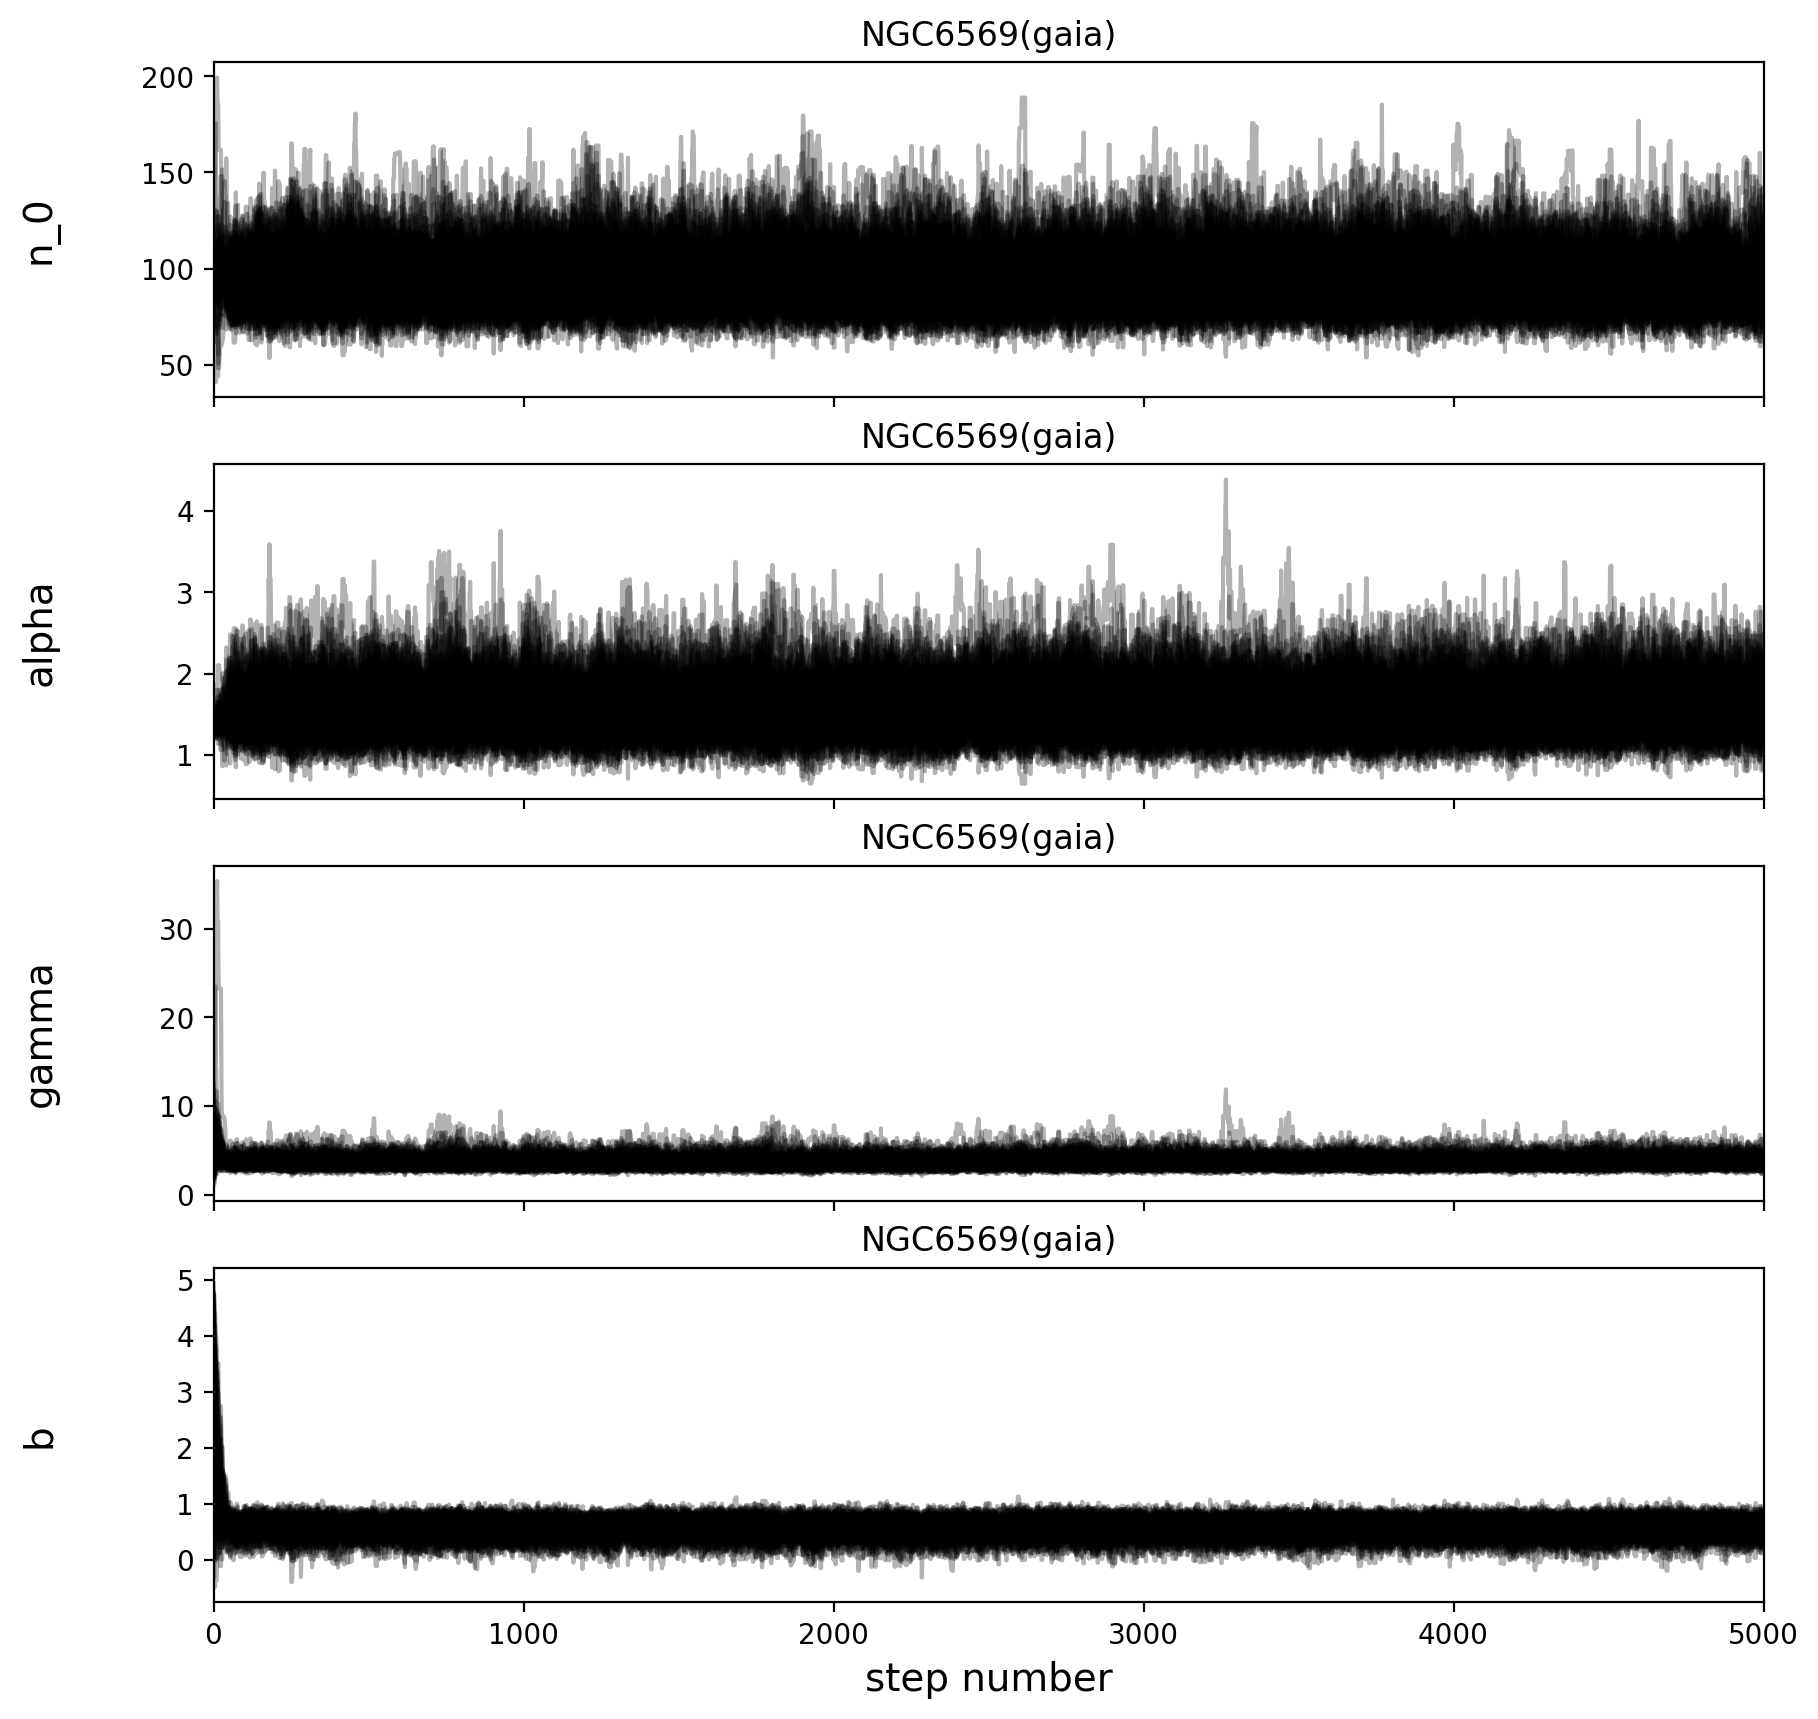

In [49]:

fig, axes = plt.subplots(4, figsize=(10, 10), sharex=True)
samples = sampler.get_chain()
labels = ["n_0", "alpha", "gamma","b"]
#ax.set_title('NGC6569(gaia)')
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i],fontsize=14)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.set_title('NGC6569(gaia)')
axes[-1].set_xlabel("step number",fontsize=14);

plt.show()

In [98]:
y = sampler.lnprobability #plot it as a function of step number for all chains
x= [1,5000,5000]
plt.plot(x, y)


ValueError: x and y must have same first dimension, but have shapes (3,) and (100, 5000)

In [50]:
tau = sampler.get_autocorr_time()
print(tau)

[58.2899717  63.72393803 61.77763611 54.10644182]


In [51]:
flat_samples = sampler.get_chain(discard=1500, thin=15, flat=True)
print(flat_samples.shape)

(23300, 4)


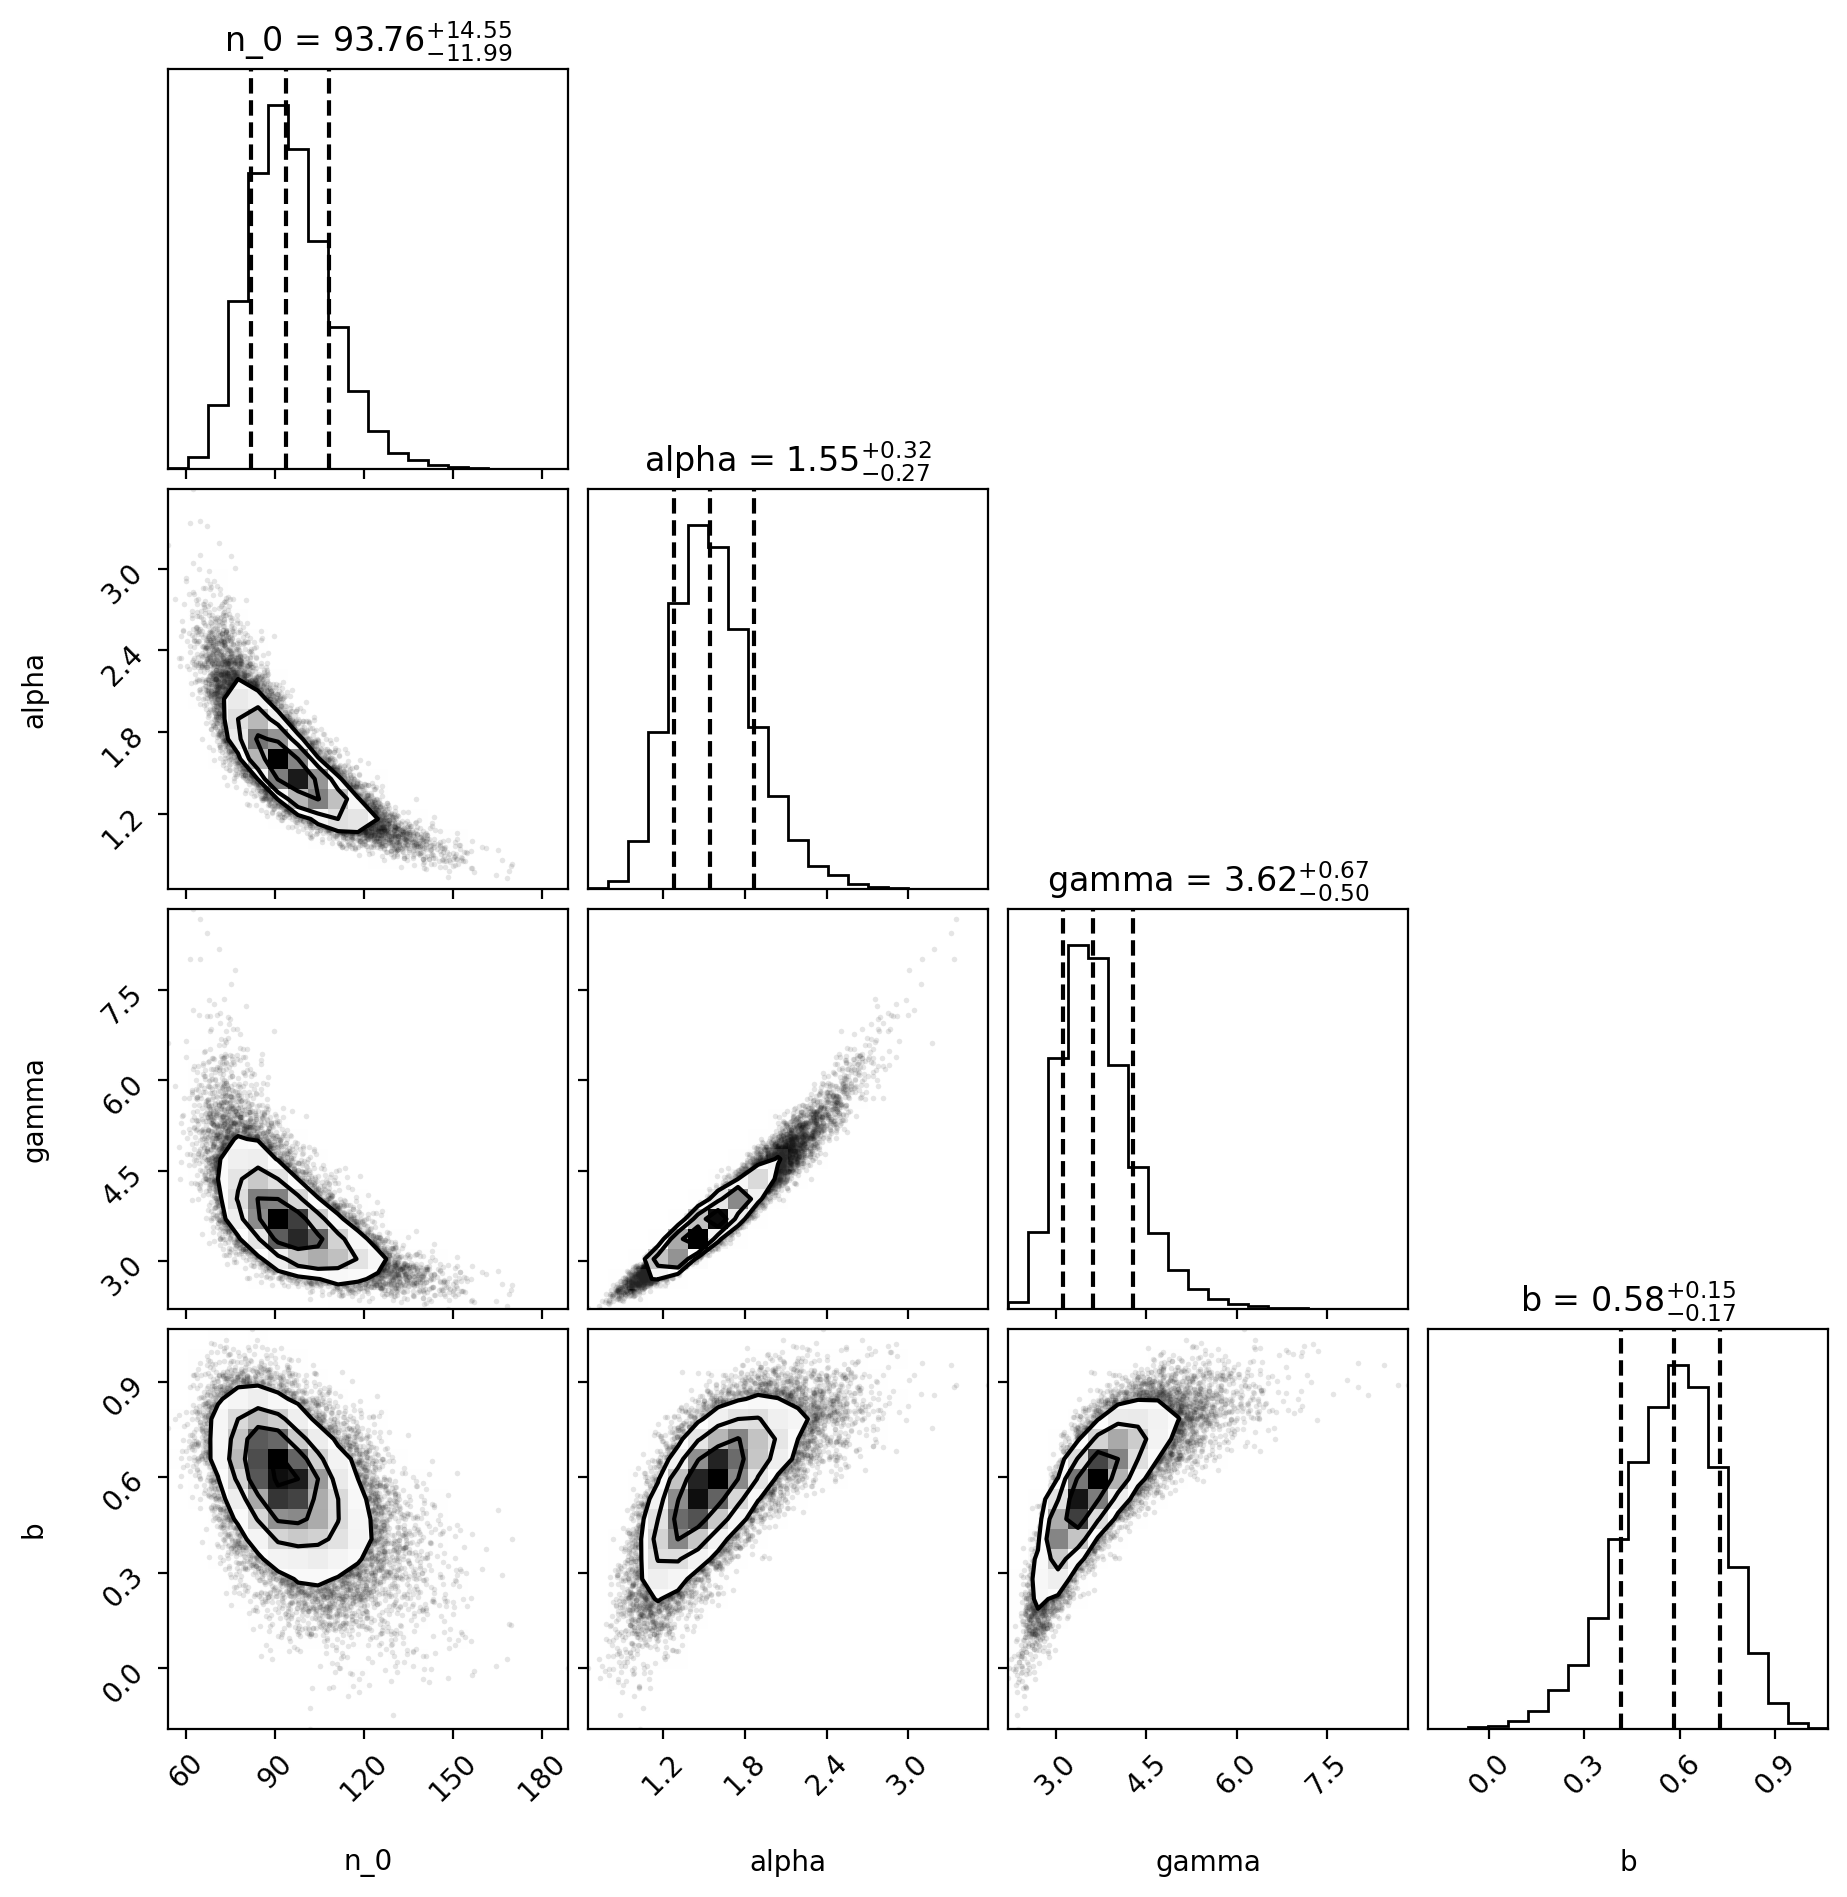

In [52]:
import corner

fig = corner.corner(
    flat_samples, labels=['n_0', 'alpha', 'gamma','b'], quantiles=[0.16, 0.5, 0.84], show_titles=True,
);
plt.show()

In [61]:
import emcee
# 初始化步长
nwalkers = 100
ndim = 4  

initial_pos = [param_bdbs + 1e-4 * np.random.randn(ndim) for _ in range(nwalkers)]

n_0 = np.random.uniform(low=0, high=50, size=nwalkers)
alpha = np.random.normal(loc=param_bdbs[1], scale=0.1, size=nwalkers)
gamma = np.random.uniform(low=0, high=5, size=nwalkers)
b = np.random.uniform(low=0, high=5, size=nwalkers)

pos = np.vstack((n_0, alpha, gamma,b)).T   # 需要转置以匹配 (nwalkers, ndim) 的形状
nwalkers, ndim = pos.shape
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood_fn, args=(r_stars_bdbs,))
sampler.run_mcmc(pos, 8000, progress=True)
samples = sampler.get_chain()
print('样本链：', samples)
plt.show()

  0%|          | 0/8000 [00:00<?, ?it/s]

 40%|███▉      | 3181/8000 [00:39<00:53, 89.49it/s]C:\Users\14246\AppData\Local\Temp\ipykernel_19620\949168786.py:67: RuntimeWarning: overflow encountered in square
  chi_square = np.sum(((model - surf_dens) ** 2) / (numb_error ** 2))
 41%|████▏     | 3312/8000 [00:41<01:11, 65.24it/s]C:\Users\14246\AppData\Local\Temp\ipykernel_19620\949168786.py:67: RuntimeWarning: overflow encountered in divide
  chi_square = np.sum(((model - surf_dens) ** 2) / (numb_error ** 2))
 52%|█████▏    | 4141/8000 [00:52<00:52, 73.09it/s]C:\Users\14246\AppData\Local\Temp\ipykernel_19620\949168786.py:28: RuntimeWarning: overflow encountered in power
  return n_0*(1+(r/alpha)**2)**(-gamma/2)+b
 67%|██████▋   | 5361/8000 [01:05<00:25, 103.97it/s]C:\Users\14246\AppData\Local\Temp\ipykernel_19620\949168786.py:28: RuntimeWarning: overflow encountered in multiply
  return n_0*(1+(r/alpha)**2)**(-gamma/2)+b
 83%|████████▎ | 6678/8000 [01:19<00:20, 64.76it/s] Traceback (most recent call last):
  File "c:\Users\14246\

emcee: Exception while calling your likelihood function:
  params: [ 23.73461307  33.4955081  414.33823195   0.55632267]
  args: (<Column name='ra' dtype='float64' length=553>
 4.580203191998286
 4.164426721649217
 4.012125705905173
 4.472075316896166
 4.702153183381906
 4.690973058971103
 4.188181543341927
 3.608110264387592
3.8369505078882122
3.6659811456144986
   4.3534422656097
 4.518961849805169
               ...
  6.22974570909627
 6.143654785226228
 6.223543521178472
 6.231426138534968
 6.777527442954715
 7.010109186026281
 6.949618982363687
 7.474222902753011
 7.748795490916053
 7.886523545898302
 8.672176854746427
 8.917813745533584,)
  kwargs: {}
  exception:


KeyboardInterrupt: 

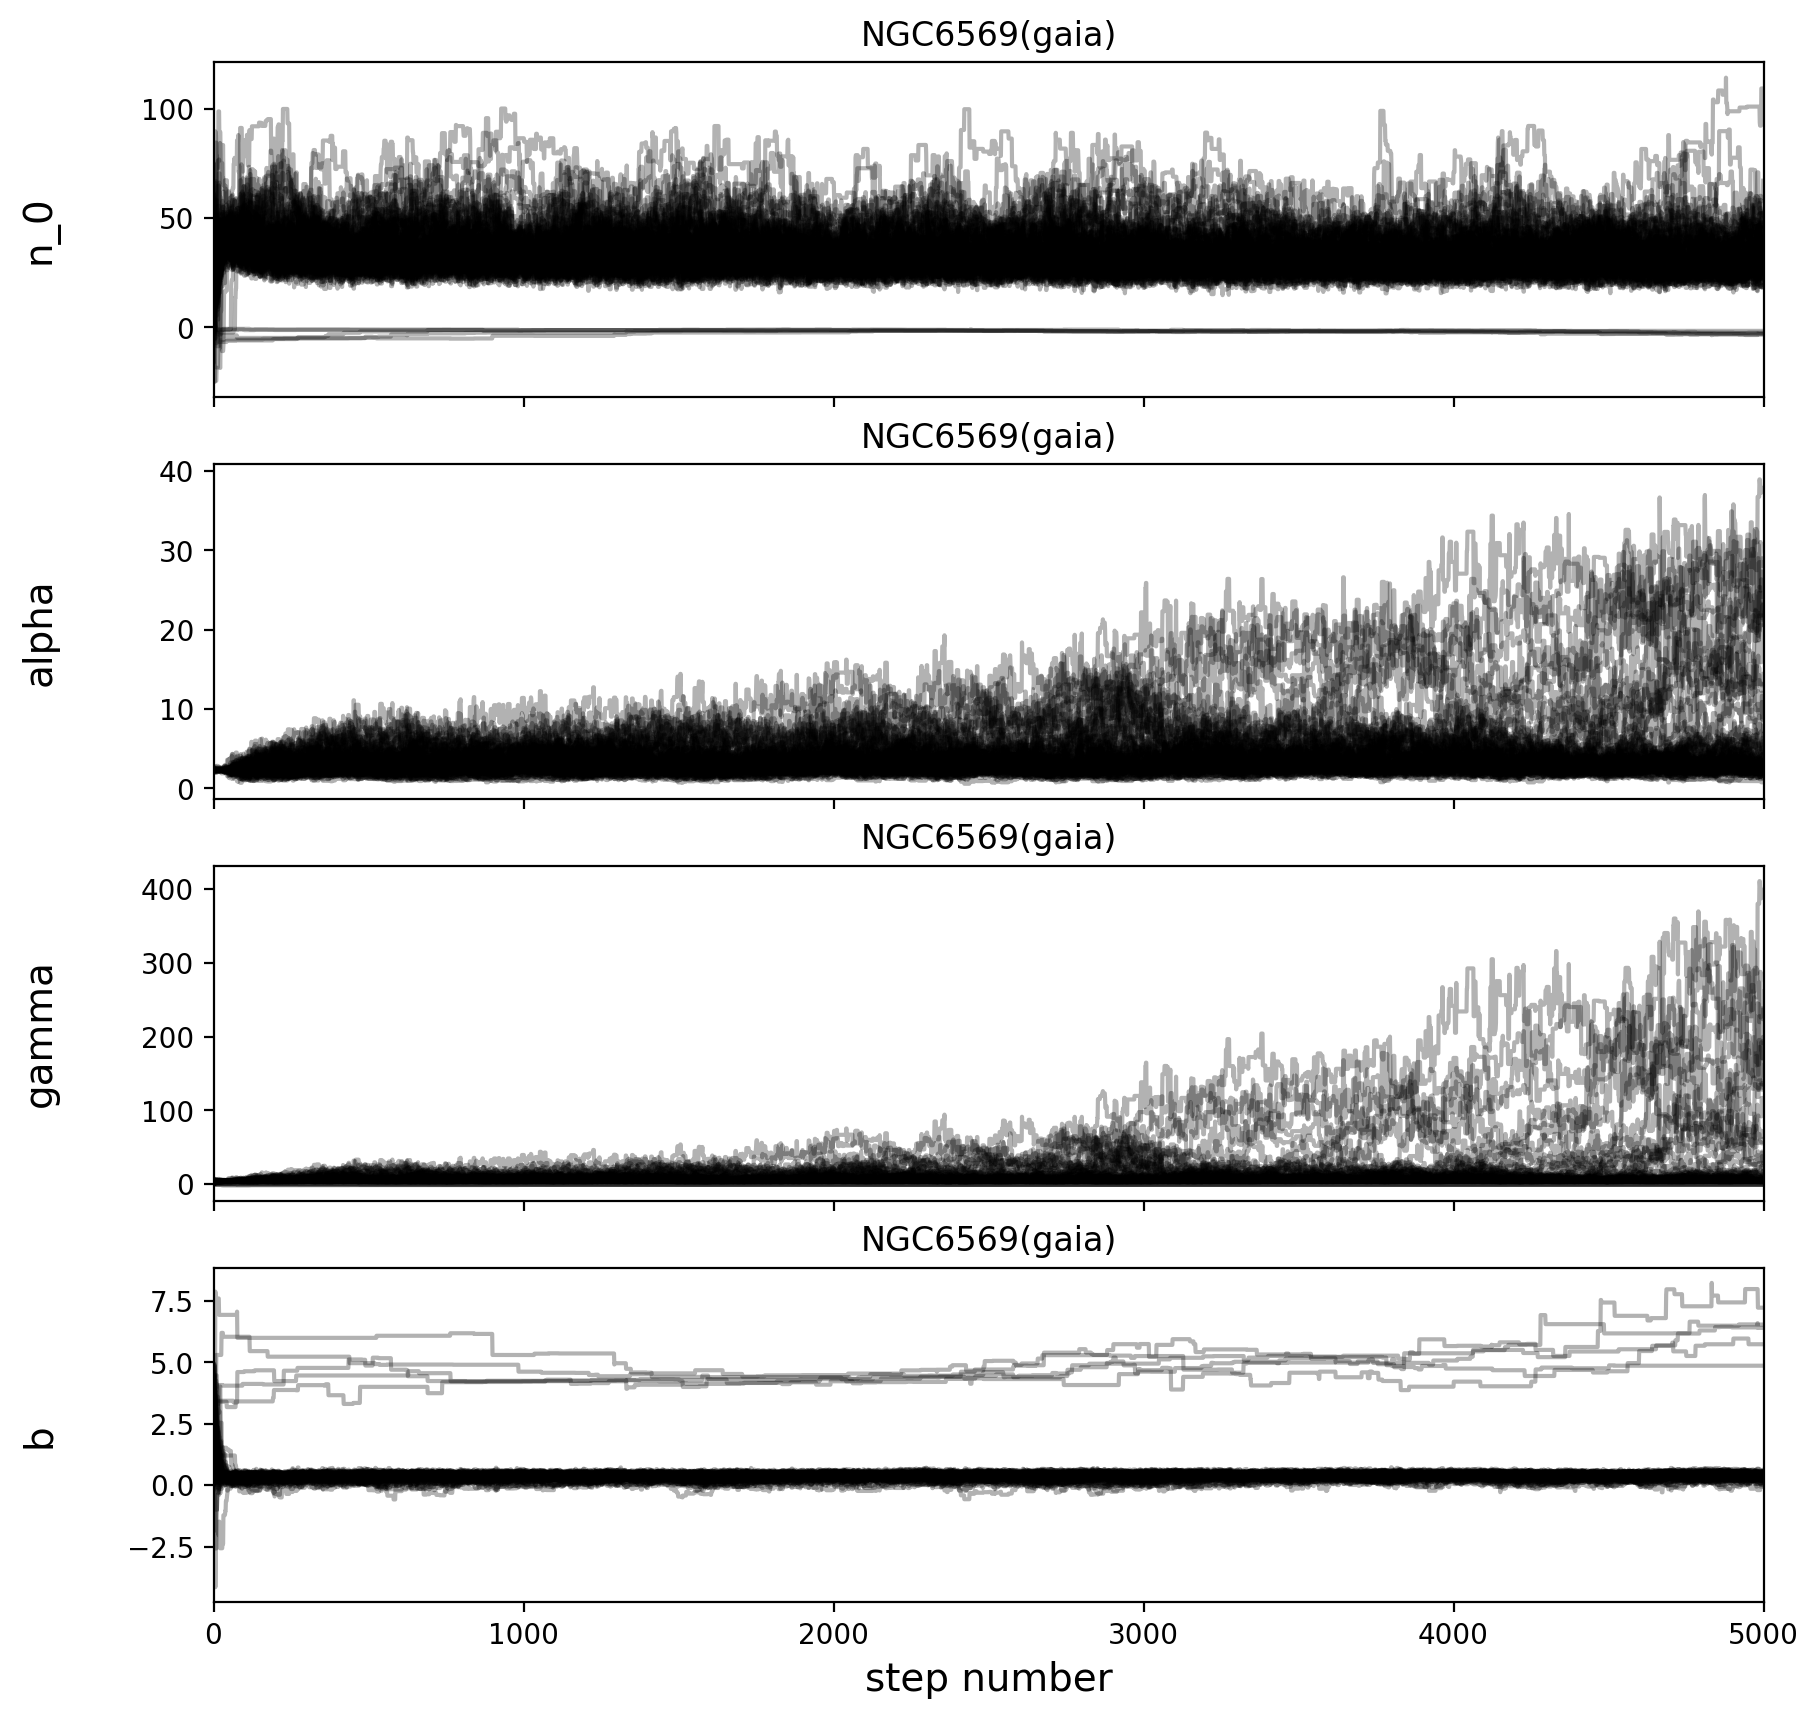

In [42]:
fig, axes = plt.subplots(4, figsize=(10, 10), sharex=True)
samples = sampler.get_chain()
labels = ["n_0", "alpha", "gamma","b"]
#ax.set_title('NGC6569(gaia)')
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i],fontsize=14)
    ax.yaxis.set_label_coords(-0.1, 0.5)
    ax.set_title('NGC6569(gaia)')
axes[-1].set_xlabel("step number",fontsize=14);

plt.show()

In [43]:
tau = sampler.get_autocorr_time()
print(tau)

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 100;
tau: [232.64997849 300.7469547  296.39224238 186.4427682 ]

In [127]:
flat_samples = sampler.get_chain(discard=1500, thin=15, flat=True)
print(flat_samples.shape)

(43300, 3)


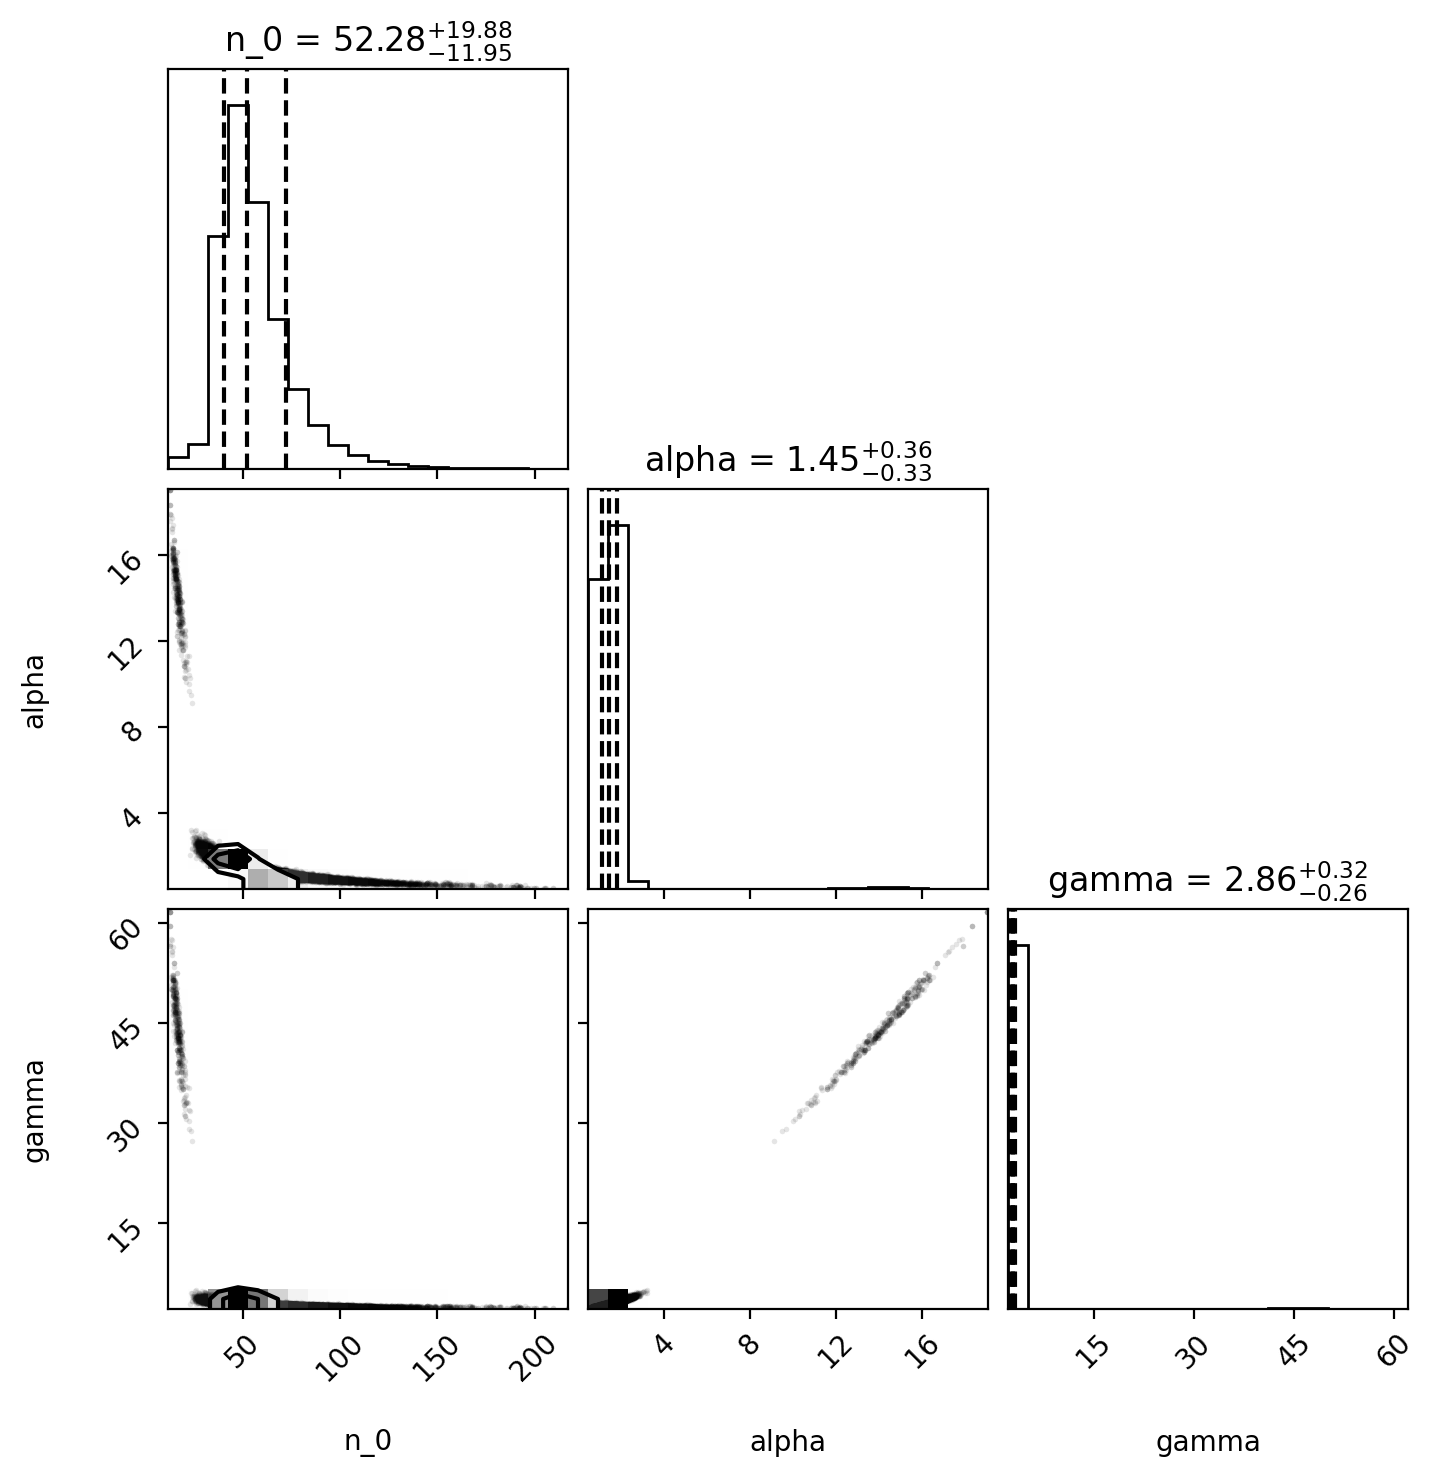

In [128]:
import corner

fig = corner.corner(
    flat_samples, labels=['n_0', 'alpha', 'gamma'], quantiles=[0.16, 0.5, 0.84], show_titles=True,
);
plt.show()

In [99]:
#all survey together
nwalkers = 100
ndim = 8   # 参数维度为

initial_pos_bdbs = [param_bdbs + 1e-4 * np.random.randn(ndim) for _ in range(nwalkers)]
initial_pos_hst = [param_hst + 1e-4 * np.random.randn(ndim) for _ in range(nwalkers)]
initial_pos_gaia = [param_gaia + 1e-4 * np.random.randn(ndim) for _ in range(nwalkers)]

n_0_bdbs = np.random.uniform(low=100, high=300, size=nwalkers)
n_0_hst = np.random.uniform(low=100, high=300, size=nwalkers)
n_0_gaia = np.random.uniform(low=100, high=300, size=nwalkers)
b_bdbs = np.random.uniform(low=10, high=30, size=nwalkers)
b_hst = np.random.uniform(low=10, high=30, size=nwalkers)
b_gaia = np.random.uniform(low=10, high=30, size=nwalkers)
alpha = np.random.normal(loc=param_bdbs[1], scale=0.1, size=nwalkers)
gamma = np.random.uniform(low=0.1, high=4, size=nwalkers)

pos = np.vstack((n_0_bdbs,n_0_hst,n_0_gaia,b_bdbs,b_hst,b_gaia, alpha, gamma)).T   # 需要转置以匹配 (nwalkers, ndim) 的形状
nwalkers, ndim = pos.shape
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood_fn, args=(r_stars_arc,))
sampler.run_mcmc(pos, 5000, progress=True)
samples = sampler.get_chain()
print('样本链：', samples)

ValueError: operands could not be broadcast together with shapes (3,) (8,) 

In [276]:
import numpy as np
import emcee

nwalkers = 100
ndim = 8   

n_0_bdbs = np.random.uniform(low=10, high=40, size=nwalkers)
n_0_hst = np.random.uniform(low=10000, high=30000, size=nwalkers)
n_0_gaia = np.random.uniform(low=50, high=300, size=nwalkers)
b_bdbs = np.random.uniform(low=10, high=30, size=nwalkers)
b_hst = np.random.uniform(low=10, high=30, size=nwalkers)
b_gaia = np.random.uniform(low=10, high=30, size=nwalkers)
alpha = np.random.uniform(low=0.1, high=4, size=nwalkers)
gamma = np.random.uniform(low=0.1, high=4, size=nwalkers)

pos = np.vstack((n_0_bdbs, n_0_hst, n_0_gaia, b_bdbs, b_hst, b_gaia, alpha, gamma)).T

assert pos.shape == (nwalkers, ndim), "Initial positions shape mismatch."

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood_fn_allsurveys, 
                                args=(r_stars_hst, r_stars_bdbs, r_stars_gaia))

sampler.run_mcmc(pos, 5000, progress=True)

# 获取样本链
samples = sampler.get_chain()
print('样本链：', samples)


  4%|▍         | 211/5000 [00:22<08:37,  9.25it/s]

C:\Users\14246\AppData\Local\Temp\ipykernel_18436\606231281.py:74: RuntimeWarning: overflow encountered in square
  chi_square = np.sum(((model - surf_dens) ** 2) / (numb_error ** 2))



 74%|███████▍  | 3693/5000 [06:18<02:06, 10.37it/s]

C:\Users\14246\AppData\Local\Temp\ipykernel_18436\606231281.py:28: RuntimeWarning: overflow encountered in power
  return n_0*(1+(r/alpha)**2)**(-gamma/2)

C:\Users\14246\AppData\Local\Temp\ipykernel_18436\606231281.py:28: RuntimeWarning: overflow encountered in multiply
  return n_0*(1+(r/alpha)**2)**(-gamma/2)



 75%|███████▍  | 3727/5000 [06:21<02:11,  9.68it/s]

C:\Users\14246\AppData\Local\Temp\ipykernel_18436\606231281.py:74: RuntimeWarning: overflow encountered in divide
  chi_square = np.sum(((model - surf_dens) ** 2) / (numb_error ** 2))



100%|██████████| 5000/5000 [08:29<00:00,  9.81it/s]

样本链： [[[ 3.35618624e+01  1.38396677e+04  1.66158893e+02 ...  2.74195294e+01
    9.60188441e-01  4.79872765e-01]
  [ 3.38626175e+01  1.80509043e+04  1.54064324e+02 ...  1.58597806e+01
    2.67186758e-01  9.76198217e-01]
  [ 4.01929873e+01  1.97014203e+04  8.51564942e+01 ...  3.01082942e+01
    3.92676288e-01  6.36458780e+00]
  ...
  [ 1.09830380e+01  1.44781746e+04  9.25169522e+01 ...  1.54440721e+01
    3.77329981e+00  3.49443410e+00]
  [ 2.04936182e+01  1.63326494e+04  2.28259553e+02 ...  2.58563855e+01
    9.51514128e-01  1.79161942e+00]
  [ 2.14796571e+01  1.78017861e+04  1.41241027e+02 ...  1.59102458e+01
    1.40484671e+00 -4.40017753e-01]]

 [[ 3.45480325e+01  1.40334504e+04  1.60566591e+02 ...  2.77882443e+01
    8.75441904e-01  3.73179262e-01]
  [ 3.38626175e+01  1.80509043e+04  1.54064324e+02 ...  1.58597806e+01
    2.67186758e-01  9.76198217e-01]
  [ 4.01929873e+01  1.97014203e+04  8.51564942e+01 ...  3.01082942e+01
    3.92676288e-01  6.36458780e+00]
  ...
  [ 1.09830380e+01

In [109]:
import numpy as np
import emcee

nwalkers = 800
ndim = 8   

n_0_bdbs = np.random.uniform(low=100, high=300, size=nwalkers)
n_0_hst = np.random.uniform(low=100, high=300, size=nwalkers)
n_0_gaia = np.random.uniform(low=100, high=300, size=nwalkers)
b_bdbs = np.random.uniform(low=10, high=30, size=nwalkers)
b_hst = np.random.uniform(low=10, high=30, size=nwalkers)
b_gaia = np.random.uniform(low=10, high=30, size=nwalkers)
alpha = np.random.normal(loc=param_bdbs[1], scale=0.1, size=nwalkers)
gamma = np.random.uniform(low=0.1, high=4, size=nwalkers)

pos = np.vstack((n_0_bdbs, n_0_hst, n_0_gaia, b_bdbs, b_hst, b_gaia, alpha, gamma)).T

assert pos.shape == (nwalkers, ndim), "Initial positions shape mismatch."

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood_fn_allsurveys, 
                                args=(r_stars_hst, r_stars_bdbs, r_stars_gaia))

sampler.run_mcmc(pos, 5000, progress=True)

# 获取样本链
samples = sampler.get_chain()
print('样本链：', samples)


  0%|          | 15/5000 [00:31<2:42:24,  1.95s/it]C:\Users\14246\AppData\Local\Temp\ipykernel_27312\2468459066.py:28: RuntimeWarning: overflow encountered in power
  return n_0*(1+(r/alpha)**2)**(-gamma/2)
C:\Users\14246\AppData\Local\Temp\ipykernel_27312\2468459066.py:28: RuntimeWarning: overflow encountered in multiply
  return n_0*(1+(r/alpha)**2)**(-gamma/2)
C:\Users\14246\AppData\Local\Temp\ipykernel_27312\2468459066.py:73: RuntimeWarning: overflow encountered in square
  chi_square = np.sum(((model - surf_dens) ** 2) / (numb_error ** 2))
  0%|          | 16/5000 [00:33<2:34:15,  1.86s/it]C:\Users\14246\AppData\Local\Temp\ipykernel_27312\2468459066.py:73: RuntimeWarning: overflow encountered in divide
  chi_square = np.sum(((model - surf_dens) ** 2) / (numb_error ** 2))
 27%|██▋       | 1348/5000 [46:18<2:26:27,  2.41s/it]Traceback (most recent call last):
  File "c:\Users\14246\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\histograms.py", line 351, in _unsi

emcee: Exception while calling your likelihood function:
  params: [  1158.37449426 -13894.11518466  11495.46609005   -768.45780071
   3766.05852415   1128.11001684     62.09427089    111.47722654]
  args: (<Column name='matchra' dtype='float64' unit='deg' length=61627>
 1.6240316134223096
 1.5334438732755937
 1.5982674042319143
 1.6326456535839622
 1.5346239576136413
  1.645612857846126
  1.643364224362664
 1.6384116207060433
  1.601548593621863
  1.604210945691963
 1.6388890564786929
 0.8181203976097525
                ...
 0.7804031624825128
 0.7813188230761635
 0.6422058636946121
 0.3511783231323991
 0.2217395788404642
 0.6109102195966993
 0.6320255215985942
0.12168418466900774
 0.6441419031886835
 0.6273593912141757
  0.395058610139459
 0.5398494109902489, <Column name='ra' dtype='float64' length=633>
 4.580203191998286
 4.164426721649217
 4.012125705905173
 4.472075316896166
 4.702153183381906
 4.690973058971103
 4.188181543341927
 3.608110264387592
3.8369505078882122
3.619821680

KeyboardInterrupt: 

In [277]:
tau = sampler.get_autocorr_time()
#print(tau)
min_chain_length = 50 * np.max(tau)
print(f"推荐的最小链条长度: {min_chain_length}")


AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 7 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 100;
tau: [212.86619523  78.03975548 169.07239599 163.61815413 286.31168646
 374.96262771 678.62156465 677.62694307]

In [278]:
flat_samples = sampler.get_chain(discard=1000, thin=15, flat=True)
print(flat_samples.shape)

(26600, 8)


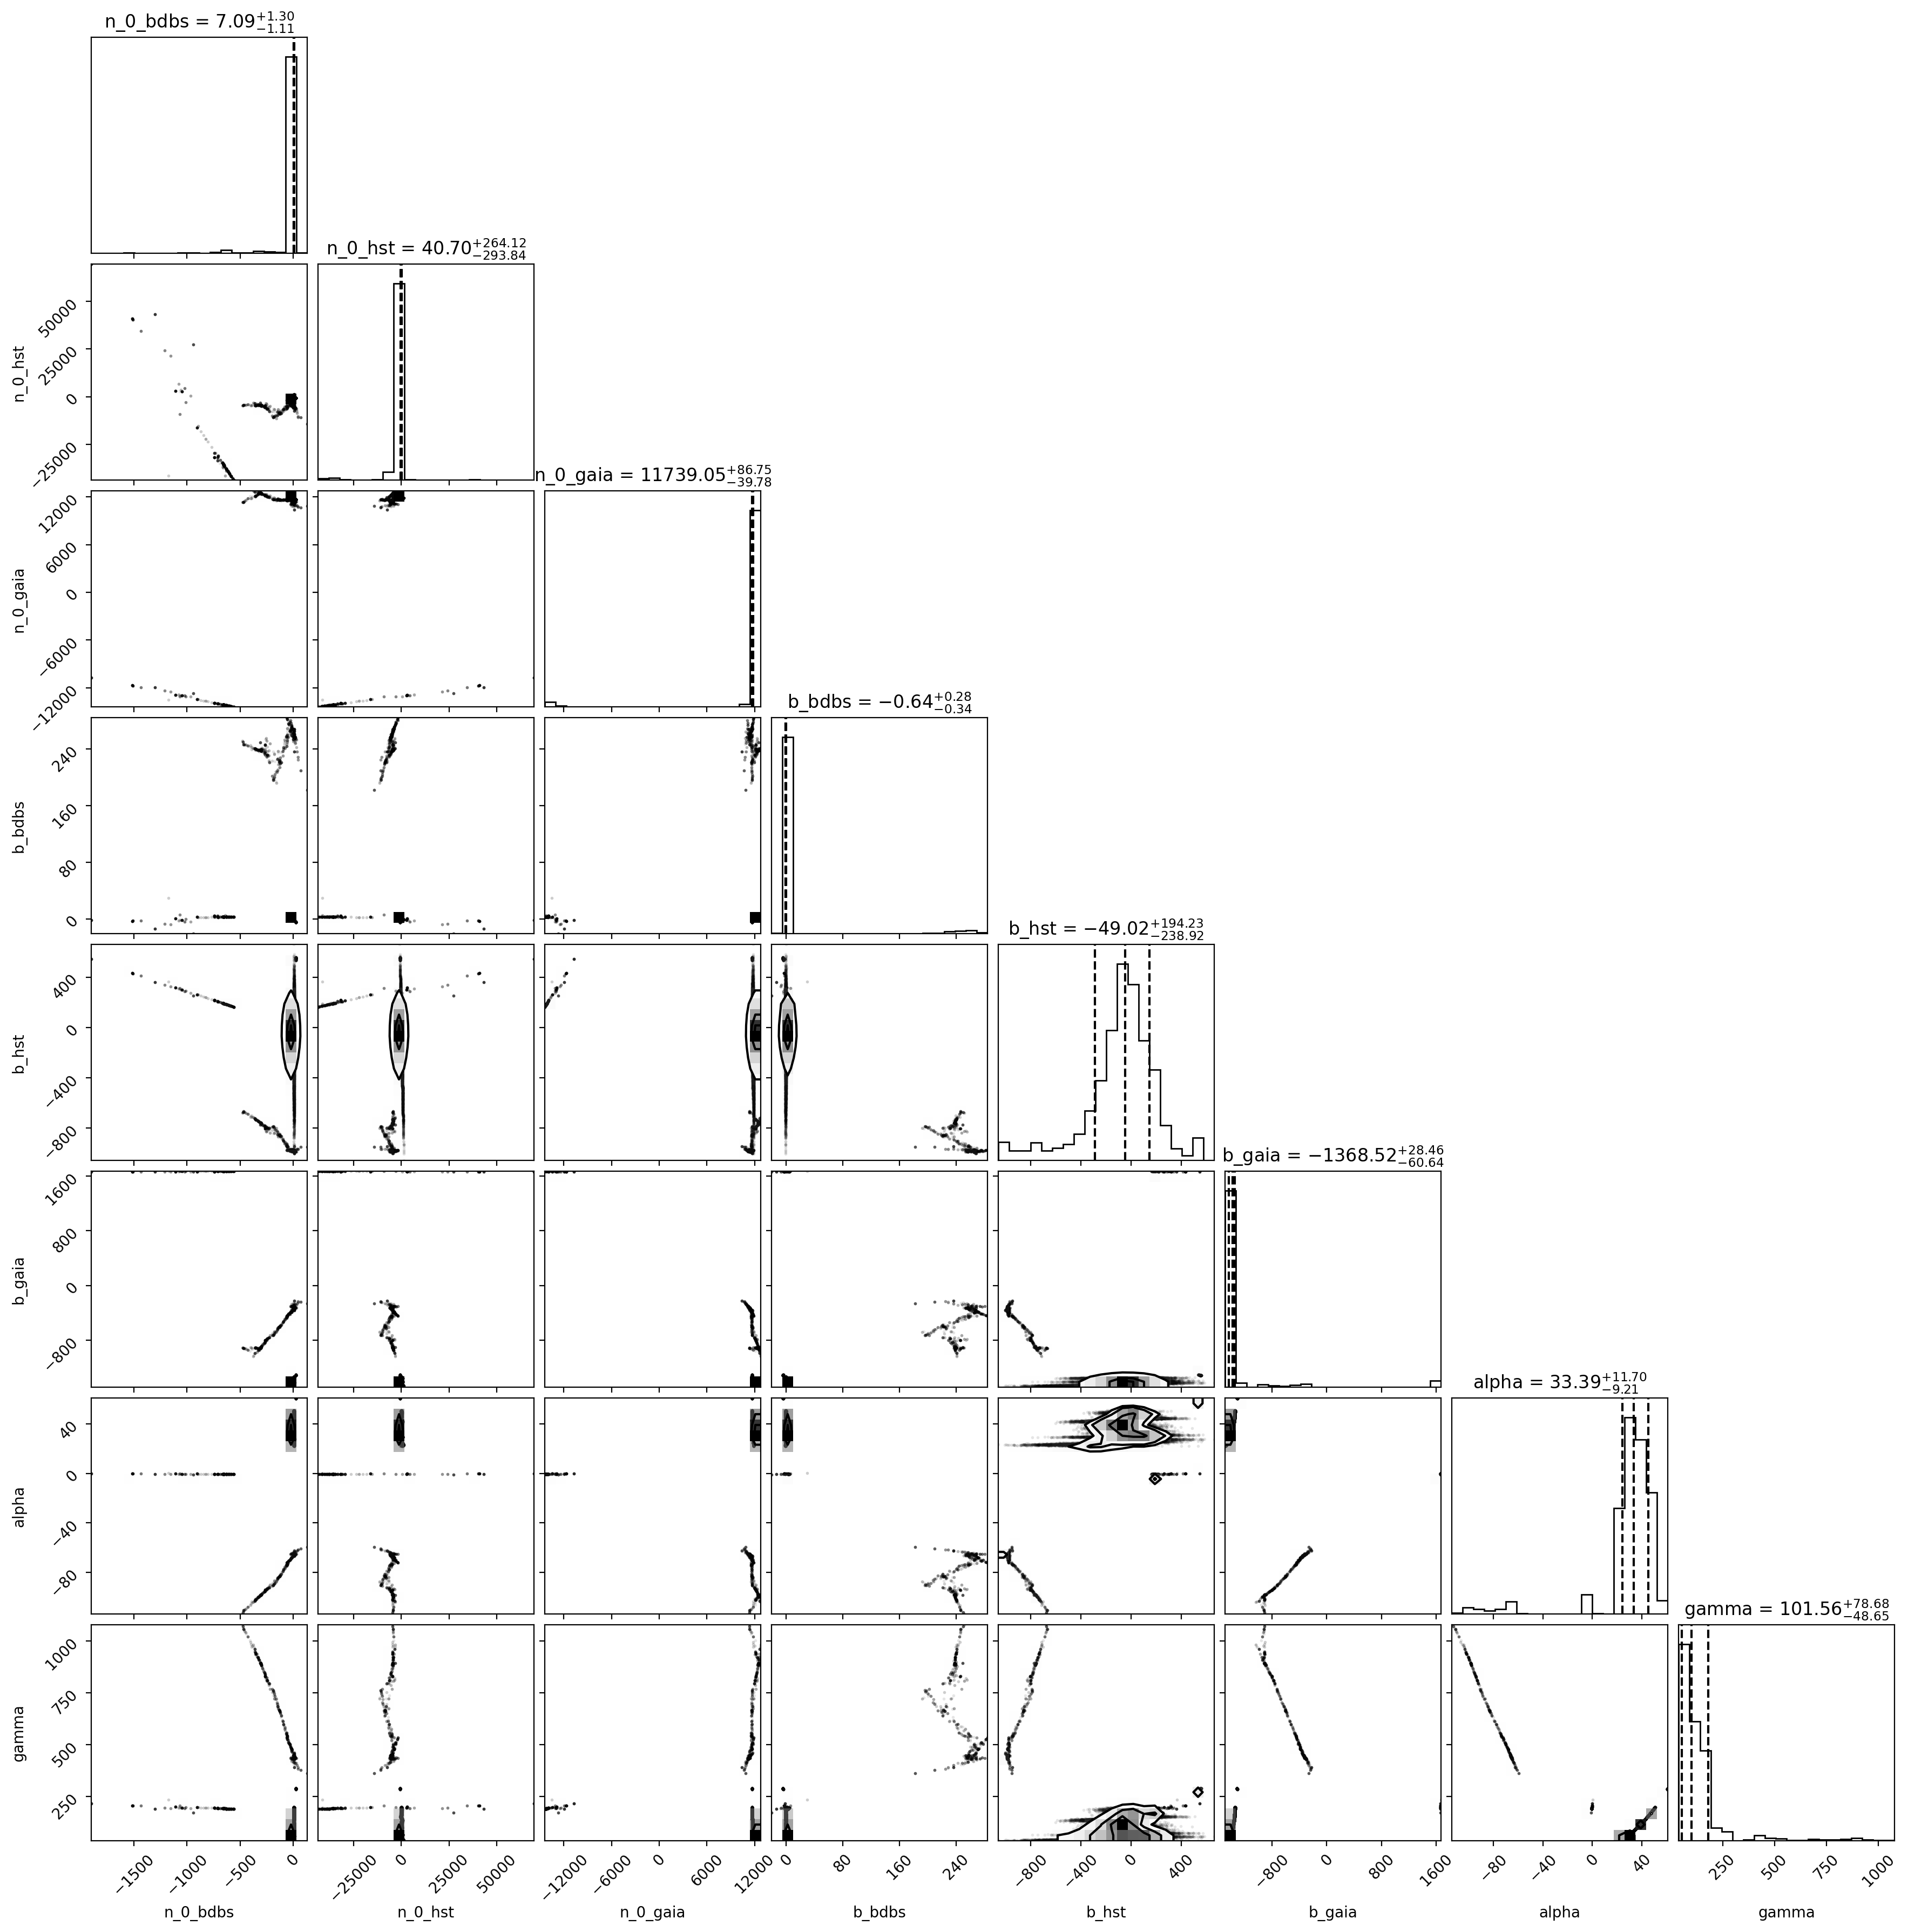

In [279]:
import corner

fig = corner.corner(
    flat_samples, labels=['n_0_bdbs','n_0_hst','n_0_gaia','b_bdbs','b_hst' ,'b_gaia','alpha', 'gamma'], quantiles=[0.16, 0.5, 0.84], show_titles=True,
);

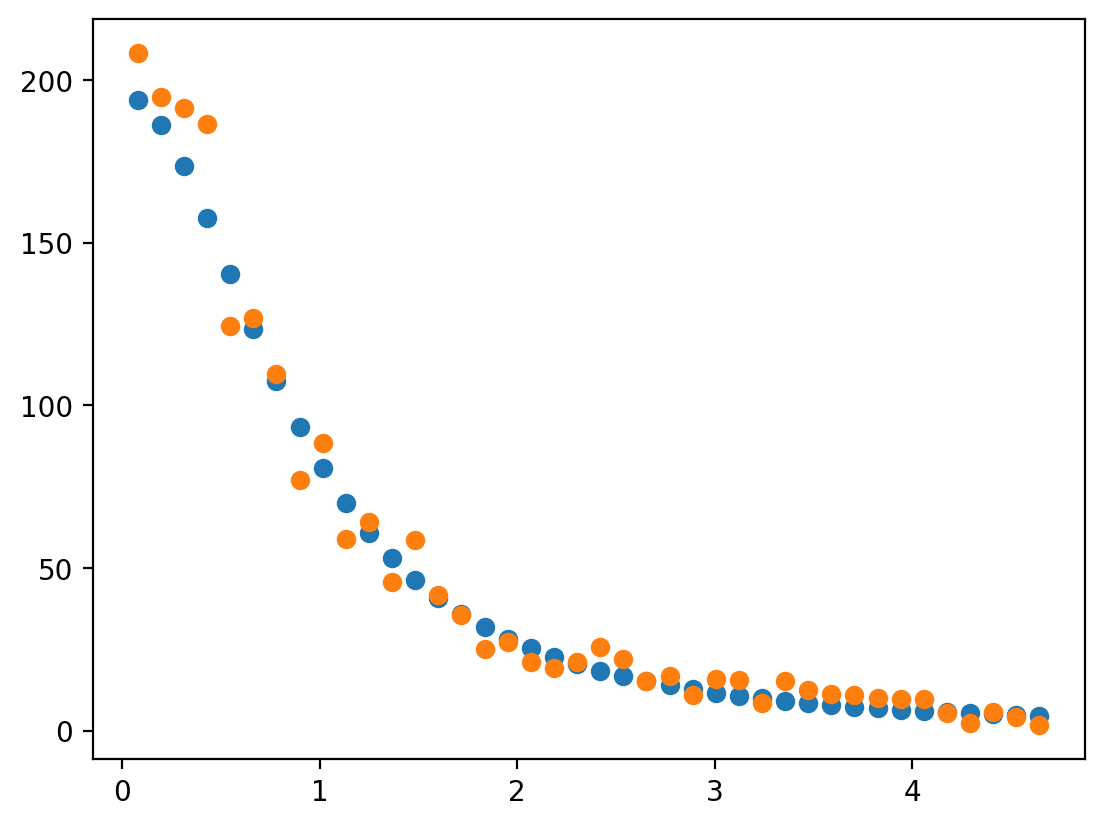

In [67]:
plt.scatter(r_cent_annulii,model)
plt.scatter(r_cent_annulii,surf_dens)

In [2]:
import io
import requests

from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.units import Quantity
import numpy as np
from astropy.utils.data import download_file
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
from astropy.wcs import wcs
import astropy.io.fits as fits
from astropy.io.fits import getdata, getheader

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm

from rama import read_url, is_template, count, unroll
from rama.models.source import Source, SourcePosition, LuminosityMeasurement, Detection
from rama.models.coordinates import SpaceFrame
from rama.models.photdmalt import PhotometryFilter

# Suppress votable parse warnings.
import warnings
warnings.filterwarnings("ignore")

# Use full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [4]:
%matplotlib inline
import astropy, pylab, time, sys, os, requests, json
import numpy as np
from pprint import pprint

from astropy.table import Table
import pandas as pd

from PIL import Image
from io import BytesIO, StringIO

# Set page width to fill browser for longer output lines
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# set width for pprint
astropy.conf.max_width = 150

In [5]:
hscapiurl = "https://catalogs.mast.stsci.edu/api/v0.1/hsc"

def hsccone(ra,dec,radius,table="summary",release="v3",format="csv",magtype="magaper2",
            columns=None, baseurl=hscapiurl, verbose=False,
            **kw):
    """Do a cone search of the HSC catalog
    
    Parameters
    ----------
    ra (float): (degrees) J2000 Right Ascension
    dec (float): (degrees) J2000 Declination
    radius (float): (degrees) Search radius (<= 0.5 degrees)
    table (string): summary, detailed, propermotions, or sourcepositions
    release (string): v3 or v2
    magtype (string): magaper2 or magauto (only applies to summary table)
    format: csv, votable, json, table
    columns: list of column names to include (None means use defaults)
    baseurl: base URL for the request
    verbose: print info about request
    **kw: other parameters (e.g., 'numimages.gte':2)
    """
    
    data = kw.copy()
    data['ra'] = ra
    data['dec'] = dec
    data['radius'] = radius
    return hscsearch(table=table,release=release,format=format,magtype=magtype,
                     columns=columns,baseurl=baseurl,verbose=verbose,**data)


def hscsearch(table="summary",release="v3",magtype="magaper2",format="csv",
              columns=None, baseurl=hscapiurl, verbose=False,
              **kw):
    """Do a general search of the HSC catalog (possibly without ra/dec/radius)
    
    Parameters
    ----------
    table (string): summary, detailed, propermotions, or sourcepositions
    release (string): v3 or v2
    magtype (string): magaper2 or magauto (only applies to summary table)
    format: csv, votable, json, table
    columns: list of column names to include (None means use defaults)
    baseurl: base URL for the request
    verbose: print info about request
    **kw: other parameters (e.g., 'numimages.gte':2).  Note this is required!
    """
    
    data = kw.copy()
    if not data:
        raise ValueError("You must specify some parameters for search")
    if format not in ("csv","votable","json","table"):
        raise ValueError("Bad value for format")
    if format == "table":
        rformat = "csv"
    else:
        rformat = format
    url = "{}.{}".format(cat2url(table,release,magtype,baseurl=baseurl),rformat)
    if columns:
        # check that column values are legal
        # create a dictionary to speed this up
        dcols = {}
        for col in hscmetadata(table,release,magtype)['name']:
            dcols[col.lower()] = 1
        badcols = []
        for col in columns:
            if col.lower().strip() not in dcols:
                badcols.append(col)
        if badcols:
            raise ValueError('Some columns not found in table: {}'.format(', '.join(badcols)))
        # two different ways to specify a list of column values in the API
        # data['columns'] = columns
        data['columns'] = '[{}]'.format(','.join(columns))

    # either get or post works
    # r = requests.post(url, data=data)
    r = requests.get(url, params=data)

    if verbose:
        print(r.url)
    r.raise_for_status()
    if format == "json":
        return r.json()
    elif format == "table":
        # use pandas to work around bug in Windows for ascii.read
        return Table.from_pandas(pd.read_csv(StringIO(r.text)))
    else:
        return r.text


def hscmetadata(table="summary",release="v3",magtype="magaper2",baseurl=hscapiurl):
    """Return metadata for the specified catalog and table
    
    Parameters
    ----------
    table (string): summary, detailed, propermotions, or sourcepositions
    release (string): v3 or v2
    magtype (string): magaper2 or magauto (only applies to summary table)
    baseurl: base URL for the request
    
    Returns an astropy table with columns name, type, description
    """
    url = "{}/metadata".format(cat2url(table,release,magtype,baseurl=baseurl))
    r = requests.get(url)
    r.raise_for_status()
    v = r.json()
    # convert to astropy table
    tab = Table(rows=[(x['name'],x['type'],x['description']) for x in v],
               names=('name','type','description'))
    return tab


def cat2url(table="summary",release="v3",magtype="magaper2",baseurl=hscapiurl):
    """Return URL for the specified catalog and table
    
    Parameters
    ----------
    table (string): summary, detailed, propermotions, or sourcepositions
    release (string): v3 or v2
    magtype (string): magaper2 or magauto (only applies to summary table)
    baseurl: base URL for the request
    
    Returns a string with the base URL for this request
    """
    checklegal(table,release,magtype)
    if table == "summary":
        url = "{baseurl}/{release}/{table}/{magtype}".format(**locals())
    else:
        url = "{baseurl}/{release}/{table}".format(**locals())
    return url


def checklegal(table,release,magtype):
    """Checks if this combination of table, release and magtype is acceptable
    
    Raises a ValueError exception if there is problem
    """
    
    releaselist = ("v2", "v3")
    if release not in releaselist:
        raise ValueError("Bad value for release (must be one of {})".format(
            ', '.join(releaselist)))
    if release=="v2":
        tablelist = ("summary", "detailed")
    else:
        tablelist = ("summary", "detailed", "propermotions", "sourcepositions")
    if table not in tablelist:
        raise ValueError("Bad value for table (for {} must be one of {})".format(
            release, ", ".join(tablelist)))
    if table == "summary":
        magtypelist = ("magaper2", "magauto")
        if magtype not in magtypelist:
            raise ValueError("Bad value for magtype (must be one of {})".format(
                ", ".join(magtypelist)))


def mastQuery(request, url='https://mast.stsci.edu/api/v0/invoke'):
    """Perform a MAST query.

    Parameters
    ----------
    request (dictionary): The MAST request json object
    url (string): The service URL

    Returns the returned data content
    """
    
    # Encoding the request as a json string
    requestString = json.dumps(request)
    r = requests.post(url, data={'request': requestString})
    r.raise_for_status()
    return r.text


def resolve(name):
    """Get the RA and Dec for an object using the MAST name resolver
    
    Parameters
    ----------
    name (str): Name of object

    Returns RA, Dec tuple with position
    """

    resolverRequest = {'service':'Mast.Name.Lookup',
                       'params':{'input':name,
                                 'format':'json'
                                },
                      }
    resolvedObjectString = mastQuery(resolverRequest)
    resolvedObject = json.loads(resolvedObjectString)
    # The resolver returns a variety of information about the resolved object, 
    # however for our purposes all we need are the RA and Dec
    try:
        objRa = resolvedObject['resolvedCoordinate'][0]['ra']
        objDec = resolvedObject['resolvedCoordinate'][0]['decl']
    except IndexError as e:
        raise ValueError("Unknown object '{}'".format(name))
    return (objRa, objDec)

In [6]:
meta = hscmetadata("summary")
print(len(meta),"columns in summary")
filterlist = meta['name'][19::3].tolist()
print(len(filterlist),"filters")
pprint(filterlist, compact=True)
meta[:19]

ConnectionError: ('Connection aborted.', ConnectionAbortedError(10053, '你的主机中的软件中止了一个已建立的连接。', None, 10053, None))